# Imports

In [0]:
import zipfile
import numpy as np
import pandas as pd
import os
import tqdm
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import csv

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


#Отчет


## Эксперименты с архитектурой


### Резюме:
- We need to go deeper. Не смотря на то, что лучшей оказалась модель с 43 слоями, модель с 49 получала лучший результат на нетронутой выборке. (при top3 accuracy в **0.862 **loss в **1.200** и category accuarcy в **0.701** на 50 эпохах результат был **0.850** (разница ***0.012***) \\
- При увеличении количества эпох до 90, top3 accuracy возрос до **0.892**, cat accuracy - до **0.8** loss упал до **0.9**, однако на нетронутой выборке модель получила **0.852** (разница в ***0.040***), в то время обученная на 90 эпохах нейронная сеть глубже давала результат **0.850** на нетронутой выборке при значении top3 accuracy в **0.852**.
- При увеличении размера картинки, обучение происходило хуже, так как был выбран неправильный learning_rate (см loss графики пункта "Эксперименты с  исходными данными") 
Экспирименты с агументацией данных дали понять что, таким образом можно существенно расширить исходную выборку данных, однако она [агументация] может как улучшить, так и ухудшить качество обучения, конкретные параметры подбираются исходя из задачи.

### Первая модель

In [0]:
BATCH_SIZE = 256
STEPS_PER_EPOCH = 100
EPOCHS = 5

def make_model():
  """
  Define your model architecture here.
  Returns `Sequential` model.
  """
  model = Sequential()

  ### YOUR CODE HERE: replace with a better model! Batch normalization really helps!

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())

  model.add(GlobalAveragePooling2D())

  model.add(Dense(64, activation='relu'))
  model.add(Dense(NUM_CLASSES, activation="softmax"))

  return model
  
"""
Результат обучения:
Epoch 1/5
100/100 [==============================] - 288s 3s/step - loss: 5.6091 - categorical_accuracy: 0.0115 - top_3_accuracy: 0.0335
Model saved in model_0
Epoch 2/5
100/100 [==============================] - 287s 3s/step - loss: 4.9129 - categorical_accuracy: 0.0475 - top_3_accuracy: 0.1118
Model saved in model_1
Epoch 3/5
100/100 [==============================] - 285s 3s/step - loss: 4.6153 - categorical_accuracy: 0.0724 - top_3_accuracy: 0.1623
Model saved in model_2
Epoch 4/5
100/100 [==============================] - 287s 3s/step - loss: 4.4057 - categorical_accuracy: 0.1001 - top_3_accuracy: 0.2075
Model saved in model_3
Epoch 5/5
100/100 [==============================] - 285s 3s/step - loss: 4.2042 - categorical_accuracy: 0.1257 - top_3_accuracy: 0.2546
Model saved in model_4
"""


### Вторая модель
Строим более глубокую сетку, для классификации более конкретных признаков (уменьшаем размер изображения) большая разница top3acc 0.8153 и catAcc 0.6351.

In [0]:
 
BATCH_SIZE = 512
STEPS_PER_EPOCH = 256
EPOCHS = 10

def make_model():
  """
  Define your model architecture here.
  Returns `Sequential` model.
  """
  model = Sequential()

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())

  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())

  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())

  
  model.add(GlobalAveragePooling2D())

  model.add(Dense(64, activation='relu'))
  model.add(Dense(NUM_CLASSES, activation="softmax"))

  return model
  
"""
Результат обучения
  Epoch 1/10
256/256 [==============================] - 100s 391ms/step - loss: 3.9279 - categorical_accuracy: 0.2151 - top_3_accuracy: 0.3514
Model saved in model_0
Epoch 2/10
256/256 [==============================] - 99s 385ms/step - loss: 2.3598 - categorical_accuracy: 0.4576 - top_3_accuracy: 0.6570
Model saved in model_1
Epoch 3/10
256/256 [==============================] - 100s 392ms/step - loss: 2.0194 - categorical_accuracy: 0.5258 - top_3_accuracy: 0.7236
Model saved in model_2
Epoch 4/10
256/256 [==============================] - 100s 392ms/step - loss: 1.8320 - categorical_accuracy: 0.5650 - top_3_accuracy: 0.7585
Model saved in model_3
Epoch 5/10
256/256 [==============================] - 101s 394ms/step - loss: 1.7511 - categorical_accuracy: 0.5824 - top_3_accuracy: 0.7730
Model saved in model_4
Epoch 6/10
256/256 [==============================] - 101s 395ms/step - loss: 1.6781 - categorical_accuracy: 0.5971 - top_3_accuracy: 0.7844
Model saved in model_5
Epoch 7/10
256/256 [==============================] - 100s 389ms/step - loss: 1.6190 - categorical_accuracy: 0.6123 - top_3_accuracy: 0.7942
Model saved in model_6
Epoch 8/10
256/256 [==============================] - 101s 394ms/step - loss: 1.5659 - categorical_accuracy: 0.6214 - top_3_accuracy: 0.8036
Model saved in model_7
Epoch 9/10
256/256 [==============================] - 100s 391ms/step - loss: 1.5404 - categorical_accuracy: 0.6286 - top_3_accuracy: 0.8082
Model saved in model_8
Epoch 10/10
256/256 [==============================] - 100s 390ms/step - loss: 1.5013 - categorical_accuracy: 0.6351 - top_3_accuracy: 0.8153
Model saved in model_9
"""

### Лучшая модель с score 0.852

#### Модель

In [0]:
BATCH_SIZE = 512
STEPS_PER_EPOCH = 64
EPOCHS = 55


def make_model():
  """
  Define your model architecture here.
  Returns `Sequential` model.
  """
  model = Sequential()

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D())

  
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D())

  
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D())

  
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D())

  
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D())

  
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D())
  
  model.add(GlobalAveragePooling2D())

  model.add(Dense(64, activation='relu'))
  model.add(Dense(NUM_CLASSES, activation="softmax"))

  return model

#### Массивы

In [0]:
cat_acc = [0.02459716796875,
   0.14129638671875,
   0.27490234375,
   0.36834716796875,
   0.43341064453125,
   0.47271728515625,
   0.51068115234375,
   0.53546142578125,
   0.554534912109375,
   0.563995361328125,
   0.578826904296875,
   0.59417724609375,
   0.60186767578125,
   0.61236572265625,
   0.61376953125,
   0.625152587890625,
   0.62774658203125,
   0.636383056640625,
   0.633331298828125,
   0.642120361328125,
   0.643218994140625,
   0.64752197265625,
   0.651336669921875,
   0.65277099609375,
   0.6575927734375,
   0.657135009765625,
   0.6650390625,
   0.6683349609375,
   0.664764404296875,
   0.673492431640625,
   0.673736572265625,
   0.671356201171875,
   0.67547607421875,
   0.679840087890625,
   0.677520751953125,
   0.684844970703125,
   0.681060791015625,
   0.682159423828125,
   0.687103271484375,
   0.6888427734375,
   0.690673828125,
   0.690338134765625,
   0.68975830078125,
   0.694549560546875,
   0.695404052734375,
   0.693389892578125,
   0.69659423828125,
   0.702484130859375,
   0.700042724609375,
   0.70599365234375,
   0.70404052734375,
   0.699371337890625,
   0.701995849609375,
   0.70574951171875,
   0.700927734375]
loss = [5.542688682675362,
   4.233328811824322,
   3.307997390627861,
   2.7816352657973766,
   2.4551088102161884,
   2.2626824118196964,
   2.082345824688673,
   1.9592841360718012,
   1.8636007402092218,
   1.836651200428605,
   1.7532304544001818,
   1.6748966928571463,
   1.6483177337795496,
   1.5930236987769604,
   1.5922278054058552,
   1.5504786856472492,
   1.5343169439584017,
   1.4951753057539463,
   1.4979023542255163,
   1.4679305367171764,
   1.4549662824720144,
   1.4383777976036072,
   1.4292017817497253,
   1.4072934202849865,
   1.396900339052081,
   1.3854043930768967,
   1.35893720574677,
   1.3464753739535809,
   1.3663739021867514,
   1.3320483546704054,
   1.3206079099327326,
   1.3210703376680613,
   1.3026241939514875,
   1.2984652742743492,
   1.3045106679201126,
   1.2835522796958685,
   1.290334451943636,
   1.2650095354765654,
   1.262090740725398,
   1.2531720250844955,
   1.234130598604679,
   1.258774783462286,
   1.2484610080718994,
   1.2329241335391998,
   1.2272200137376785,
   1.2281939964741468,
   1.210948308929801,
   1.2027747016400099,
   1.2107891459017992,
   1.1851924248039722,
   1.1899655982851982,
   1.1956732096150517,
   1.1891954150050879,
   1.1841240115463734,
   1.1997005455195904]

top3_acc =  [0.053375244140625,
   0.266448974609375,
   0.464813232421875,
   0.57330322265625,
   0.639862060546875,
   0.6798095703125,
   0.71368408203125,
   0.73297119140625,
   0.75054931640625,
   0.758270263671875,
   0.773468017578125,
   0.78619384765625,
   0.79052734375,
   0.802886962890625,
   0.799713134765625,
   0.80828857421875,
   0.811767578125,
   0.8175048828125,
   0.817138671875,
   0.823394775390625,
   0.824462890625,
   0.826904296875,
   0.828521728515625,
   0.83319091796875,
   0.83221435546875,
   0.833038330078125,
   0.841094970703125,
   0.839080810546875,
   0.837738037109375,
   0.84307861328125,
   0.84521484375,
   0.844451904296875,
   0.8489990234375,
   0.849273681640625,
   0.846649169921875,
   0.850494384765625,
   0.849578857421875,
   0.853851318359375,
   0.855224609375,
   0.85418701171875,
   0.857391357421875,
   0.85211181640625,
   0.856964111328125,
   0.85870361328125,
   0.860137939453125,
   0.859893798828125,
   0.86212158203125,
   0.8634033203125,
   0.860931396484375,
   0.866363525390625,
   0.864837646484375,
   0.8660888671875,
   0.865509033203125,
   0.867767333984375,
   0.862274169921875]

#### Графики

Text(0,0.5,u'Value')

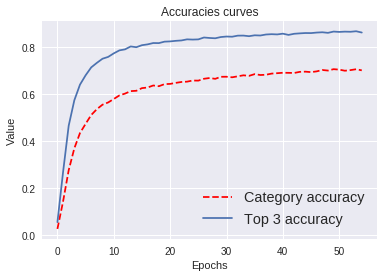

In [0]:
fig, ax = plt.subplots()
ax.plot(cat_acc, 'r--', label='Category accuracy')
ax.plot(top3_acc, label='Top 3 accuracy')
ax.legend(loc='lower right', fontsize='x-large')
ax.set_title('Accuracies curves')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

Text(0,0.5,u'Value')

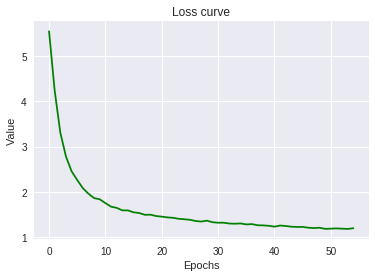

In [0]:
fig, ax = plt.subplots()
ax.plot(loss, 'g', label='loss')
ax.set_title('Loss curve')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')


#### Эксперименты с BATCH_SIZE, EPOCHS, STEPS_PER_EPOCH

 - При увеличении кол-ва эпох, модель давала лучший результат (важно не переобучить)

 - При фиксированном кол-ве эпох (25) и шаге градиента (256) увеличение размера батча c 512 до 1024, улучшило результат: \\
    <b>158s</b> 0.6s/step  - loss:<b> 1.2354</b> - categorical_accuracy: <b>0.6944</b> - top_3_accuracy: <b>0.8575</b> \\
    <b>292s</b> __1s/step - loss: <b>1.0732</b> - categorical_accuracy: <b>0.7316</b> - top_3_accuracy: <b>0.8818</b>
 - Для изменения шага градиента лучше использовать callback



### Самая глубокая модель

#### Модель

In [0]:
BATCH_SIZE = 512
STEPS_PER_EPOCH = 64
EPOCHS = 55


def make_model():
  """
  Define your model architecture here.
  Returns `Sequential` model.
  """
  model = Sequential()

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
  model.add(BatchNormalization())

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D())

  
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D())

  
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D())

  
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D())

  
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D())

  
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D())
  
  model.add(GlobalAveragePooling2D())

  model.add(Dense(64, activation='relu'))
  model.add(Dense(NUM_CLASSES, activation="softmax"))

  return model



#### Массивы

In [0]:
cat_acc = [0.159149169921875,
   0.3843269348144531,
   0.4716339111328125,
   0.5218505859375,
   0.5577659606933594,
   0.5794448852539062,
   0.5978736877441406,
   0.6089973449707031,
   0.6197357177734375,
   0.6290931701660156,
   0.6366119384765625,
   0.6433563232421875,
   0.6487960815429688,
   0.6540565490722656,
   0.6579818725585938,
   0.6621551513671875,
   0.6679801940917969,
   0.6680870056152344,
   0.6756019592285156,
   0.6771240234375,
   0.6785888671875,
   0.6824607849121094,
   0.6859893798828125,
   0.6885643005371094,
   0.6894912719726562,
   0.6920700073242188,
   0.6945266723632812,
   0.6961326599121094,
   0.6990318298339844,
   0.6999969482421875,
   0.7014389038085938,
   0.7027168273925781,
   0.7037811279296875,
   0.7050628662109375,
   0.7072410583496094,
   0.709075927734375,
   0.7099456787109375,
   0.711883544921875,
   0.7129020690917969,
   0.7135200500488281,
   0.7141990661621094,
   0.7173957824707031,
   0.7170257568359375,
   0.7168617248535156,
   0.7189559936523438,
   0.7193794250488281,
   0.7203598022460938,
   0.7223587036132812,
   0.7230873107910156,
   0.72296142578125]

loss = [4.0954949129372835,
   2.677185446023941,
   2.254581238143146,
   2.0164448134601116,
   1.8597372327931225,
   1.7590281628072262,
   1.6808841531164944,
   1.6359022175893188,
   1.5910216085612774,
   1.5478389784693718,
   1.519457880873233,
   1.4851983631961048,
   1.460995335597545,
   1.4397781323641539,
   1.4296412440016866,
   1.4054083214141428,
   1.3797236778773367,
   1.3754981234669685,
   1.348359804134816,
   1.341183066368103,
   1.3333026729524136,
   1.312041469849646,
   1.3015994490124285,
   1.2872980409301817,
   1.2868137331679463,
   1.2820721827447414,
   1.2643222636543214,
   1.251788608264178,
   1.2456228993833065,
   1.2394259781576693,
   1.234804779291153,
   1.2311858078464866,
   1.223948482889682,
   1.2188177374191582,
   1.206835761666298,
   1.2018101126886904,
   1.1940142489038408,
   1.1934803337790072,
   1.1842816765420139,
   1.1809150977060199,
   1.1766377189196646,
   1.1684965032618493,
   1.169741126243025,
   1.1696757595054805,
   1.1596050402149558,
   1.1559627600945532,
   1.1563646218273789,
   1.1451386036351323,
   1.1392276713158935,
   1.1423916555941105]

top3_acc = [0.29581451416015625,
   0.591796875,
   0.6758384704589844,
   0.7200736999511719,
   0.7474327087402344,
   0.7657089233398438,
   0.7796707153320312,
   0.7864456176757812,
   0.7957267761230469,
   0.8027305603027344,
   0.8082809448242188,
   0.8124961853027344,
   0.8173065185546875,
   0.8204994201660156,
   0.8218040466308594,
   0.8258018493652344,
   0.83056640625,
   0.8313522338867188,
   0.8349227905273438,
   0.83636474609375,
   0.8369255065917969,
   0.8407554626464844,
   0.8429794311523438,
   0.8443756103515625,
   0.8451576232910156,
   0.8458900451660156,
   0.8488960266113281,
   0.8508872985839844,
   0.8522148132324219,
   0.8523750305175781,
   0.853851318359375,
   0.8535041809082031,
   0.8550643920898438,
   0.8568572998046875,
   0.8579826354980469,
   0.8580970764160156,
   0.8598098754882812,
   0.8599586486816406,
   0.86199951171875,
   0.8613357543945312,
   0.8622856140136719,
   0.8641853332519531,
   0.8631210327148438,
   0.8643264770507812,
   0.8657379150390625,
   0.8660888671875,
   0.864593505859375,
   0.8675956726074219,
   0.868621826171875,
   0.8673553466796875]

#### Графики

Text(0,0.5,u'Value')

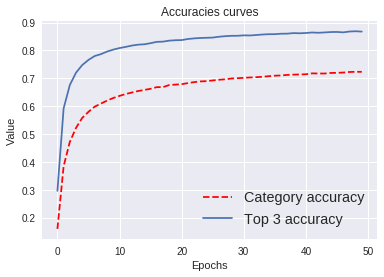

In [0]:
fig, ax = plt.subplots()
ax.plot(cat_acc, 'r--', label='Category accuracy')
ax.plot(top3_acc, label='Top 3 accuracy')
ax.legend(loc='lower right', fontsize='x-large')
ax.set_title('Accuracies curves')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

Text(0,0.5,u'Value')

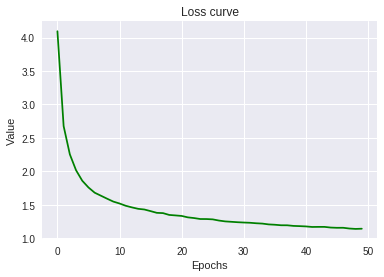

In [0]:
fig, ax = plt.subplots()
ax.plot(loss, 'g', label='loss')
ax.set_title('Loss curve')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')


###  Эксперименты с размерами картинки

#### Модель

In [0]:
IMAGE_SIZE=128

BATCH_SIZE = 128
STEPS_PER_EPOCH = 64
EPOCHS = 150

def make_model():
  """
  Define your model architecture here.
  Returns `Sequential` model.
  """
  model = Sequential()

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
  model.add(BatchNormalization())
  
  model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
  model.add(BatchNormalization())
  
  model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D())

  
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D())

  
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D())

  
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D())

  
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D())

  
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D())

    
  model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(GlobalAveragePooling2D())

  model.add(Dense(1024, activation='relu'))
  model.add(Dense(NUM_CLASSES, activation="softmax"))

  return model

def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''
    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch/step_size))
    
    return LearningRateScheduler(schedule)

lr_sched = step_decay_schedule(initial_lr=1e-4, decay_factor=0.75, step_size=2)

#    callbacks=[ModelSaveCallback("model_{}"),
#              ReduceLROnPlateau(model='loss', factor=0.2,verbose=1,
#              patience=1, min_lr=0.0001),
#              lr_sched],



#### Массивы

In [0]:
cat_acc = [0.4322509765625,
  0.4434814453125,
  0.436767578125,
  0.4447021484375,
  0.4498291015625,
  0.4664306640625,
  0.48291015625,
  0.47607421875,
  0.48095703125,
  0.480712890625,
  0.4840087890625,
  0.484375,
  0.4879150390625,
  0.49267578125,
  0.4970703125,
  0.48876953125,
  0.4755859375,
  0.4801025390625,
  0.469482421875,
  0.46484375,
  0.4666748046875,
  0.4674072265625,
  0.4541015625,
  0.453125,
  0.4449462890625,
  0.4541015625,
  0.449951171875,
  0.453857421875,
  0.4384765625,
  0.44384765625,
  0.4490966796875,
  0.4451904296875,
  0.43798828125,
  0.442138671875,
  0.4393310546875,
  0.43408203125,
  0.4383544921875,
  0.4381103515625,
  0.4400634765625,
  0.4375,
  0.4268798828125,
  0.43359375,
  0.44189453125,
  0.4356689453125,
  0.4388427734375,
  0.43505859375,
  0.4385986328125,
  0.439453125,
  0.4415283203125,
  0.42578125,
  0.444091796875,
  0.4322509765625,
  0.4296875,
  0.434326171875,
  0.4384765625,
  0.427001953125,
  0.4395751953125,
  0.434814453125,
  0.4351806640625,
  0.425048828125,
  0.4368896484375,
  0.4407958984375,
  0.421630859375,
  0.4371337890625,
  0.44384765625,
  0.422607421875,
  0.4244384765625,
  0.435791015625,
  0.438232421875,
  0.4288330078125,
  0.4344482421875,
  0.4315185546875,
  0.435302734375,
  0.4268798828125,
  0.435791015625,
  0.4356689453125,
  0.434326171875,
  0.43212890625,
  0.42578125,
  0.4210205078125,
  0.43701171875,
  0.4339599609375,
  0.4381103515625,
  0.43359375,
  0.4232177734375,
  0.4354248046875,
  0.4495849609375,
  0.434814453125,
  0.43603515625,
  0.434326171875,
  0.4393310546875,
  0.427734375,
  0.43798828125,
  0.432861328125,
  0.423583984375,
  0.4324951171875,
  0.433349609375,
  0.4346923828125,
  0.4305419921875,
  0.42822265625,
  0.4276123046875]
loss = [2.4680885784327984,
  2.472873527556658,
  2.4965452067553997,
  2.4268768951296806,
  2.4164752513170242,
  2.359053226187825,
  2.3030606023967266,
  2.3121595233678818,
  2.2988932579755783,
  2.273866046220064,
  2.2664893195033073,
  2.2634465489536524,
  2.29483843781054,
  2.292356889694929,
  2.261128695681691,
  2.3013865780085325,
  2.331161566078663,
  2.3209762051701546,
  2.3425158616155386,
  2.382807033136487,
  2.3598240986466408,
  2.3897702768445015,
  2.4268571883440018,
  2.4405363239347935,
  2.442212674766779,
  2.446333918720484,
  2.4333897791802883,
  2.436490997672081,
  2.473171040415764,
  2.4825322180986404,
  2.4522971492260695,
  2.456740587949753,
  2.461005538702011,
  2.4704791717231274,
  2.461165402084589,
  2.4972593560814857,
  2.478463299572468,
  2.499819088727236,
  2.5023694150149822,
  2.490478605031967,
  2.517062198370695,
  2.5062113143503666,
  2.4742205403745174,
  2.495595920830965,
  2.4766996167600155,
  2.497177306562662,
  2.5080887600779533,
  2.474413773044944,
  2.481488808989525,
  2.506655767560005,
  2.460327574983239,
  2.544426079839468,
  2.508283633738756,
  2.515280596911907,
  2.495601087808609,
  2.5242313779890537,
  2.491091188043356,
  2.503649730235338,
  2.498815592378378,
  2.5347756147384644,
  2.509564932435751,
  2.471431352198124,
  2.52050119638443,
  2.5140980444848537,
  2.4882354140281677,
  2.561452727764845,
  2.514063909649849,
  2.5178940519690514,
  2.490605767816305,
  2.5121261924505234,
  2.5227228552103043,
  2.5112877301871777,
  2.5397618897259235,
  2.5135655775666237,
  2.4897408299148083,
  2.5168511047959328,
  2.5253648720681667,
  2.5061205588281155,
  2.5294235106557608,
  2.5274696983397007,
  2.51240024715662,
  2.509125415235758,
  2.5197943933308125,
  2.503511391580105,
  2.540722291916609,
  2.492282163351774,
  2.4659560546278954,
  2.543206974864006,
  2.528570022433996,
  2.5130017958581448,
  2.5036022551357746,
  2.514274623245001,
  2.516697980463505,
  2.5066333562135696,
  2.537329461425543,
  2.5336676351726055,
  2.502676784992218,
  2.520548664033413,
  2.5340559370815754,
  2.5276586897671223,
  2.5231171511113644]
lr = [1.0033913e-07,
  7.525435e-08,
  7.525435e-08,
  5.6440758e-08,
  5.6440758e-08,
  4.233057e-08,
  4.233057e-08,
  3.1747927e-08,
  3.1747927e-08,
  2.3810946e-08,
  2.3810946e-08,
  1.785821e-08,
  1.785821e-08,
  1.3393657e-08,
  1.3393657e-08,
  1.0045243e-08,
  1.0045243e-08,
  7.533932e-09,
  7.533932e-09,
  5.650449e-09,
  5.650449e-09,
  4.2378367e-09,
  4.2378367e-09,
  3.1783776e-09,
  3.1783776e-09,
  2.3837832e-09,
  2.3837832e-09,
  1.7878373e-09,
  1.7878373e-09,
  1.3408781e-09,
  1.3408781e-09,
  1.0056586e-09,
  1.0056586e-09,
  7.542439e-10,
  7.542439e-10,
  5.656829e-10,
  5.656829e-10,
  4.2426218e-10,
  4.2426218e-10,
  3.1819664e-10,
  3.1819664e-10,
  2.386475e-10,
  2.386475e-10,
  1.789856e-10,
  1.789856e-10,
  1.342392e-10,
  1.342392e-10,
  1.006794e-10,
  1.006794e-10,
  7.550956e-11,
  7.550956e-11,
  5.6632164e-11,
  5.6632164e-11,
  4.2474125e-11,
  4.2474125e-11,
  3.1855595e-11,
  3.1855595e-11,
  2.3891694e-11,
  2.3891694e-11,
  1.791877e-11,
  1.791877e-11,
  1.3439078e-11,
  1.3439078e-11,
  1.0079309e-11,
  1.0079309e-11,
  7.559482e-12,
  7.559482e-12,
  5.669611e-12,
  5.669611e-12,
  4.2522084e-12,
  4.2522084e-12,
  3.1891562e-12,
  3.1891562e-12,
  2.3918673e-12,
  2.3918673e-12,
  1.7939004e-12,
  1.7939004e-12,
  1.3454253e-12,
  1.3454253e-12,
  1.009069e-12,
  1.009069e-12,
  7.5680174e-13,
  7.5680174e-13,
  5.676013e-13,
  5.676013e-13,
  4.2570098e-13,
  4.2570098e-13,
  3.1927572e-13,
  3.1927572e-13,
  2.394568e-13,
  2.394568e-13,
  1.795926e-13,
  1.795926e-13,
  1.3469445e-13,
  1.3469445e-13,
  1.01020836e-13,
  1.01020836e-13,
  7.576563e-14,
  7.576563e-14,
  5.6824222e-14,
  5.6824222e-14]
top3_acc = [0.6414794921875,
  0.6322021484375,
  0.63427734375,
  0.647216796875,
  0.6480712890625,
  0.656982421875,
  0.674560546875,
  0.6707763671875,
  0.6785888671875,
  0.6783447265625,
  0.6820068359375,
  0.678466796875,
  0.676513671875,
  0.6834716796875,
  0.6839599609375,
  0.674560546875,
  0.66796875,
  0.6739501953125,
  0.6624755859375,
  0.6624755859375,
  0.6602783203125,
  0.659912109375,
  0.653564453125,
  0.6474609375,
  0.642822265625,
  0.6455078125,
  0.6448974609375,
  0.6507568359375,
  0.637451171875,
  0.6373291015625,
  0.6500244140625,
  0.6380615234375,
  0.6402587890625,
  0.641357421875,
  0.640869140625,
  0.634033203125,
  0.6416015625,
  0.64453125,
  0.6337890625,
  0.6346435546875,
  0.6318359375,
  0.63037109375,
  0.6392822265625,
  0.636962890625,
  0.642822265625,
  0.6280517578125,
  0.6337890625,
  0.6441650390625,
  0.6434326171875,
  0.6358642578125,
  0.6461181640625,
  0.6221923828125,
  0.6307373046875,
  0.6312255859375,
  0.63037109375,
  0.6279296875,
  0.63720703125,
  0.638427734375,
  0.637939453125,
  0.6236572265625,
  0.6328125,
  0.6409912109375,
  0.6314697265625,
  0.6318359375,
  0.6461181640625,
  0.6236572265625,
  0.63623046875,
  0.626953125,
  0.6407470703125,
  0.63525390625,
  0.6226806640625,
  0.6326904296875,
  0.6275634765625,
  0.6309814453125,
  0.6373291015625,
  0.6312255859375,
  0.63232421875,
  0.6358642578125,
  0.6282958984375,
  0.6300048828125,
  0.6304931640625,
  0.6396484375,
  0.626220703125,
  0.632080078125,
  0.62451171875,
  0.63623046875,
  0.6419677734375,
  0.6273193359375,
  0.632080078125,
  0.6304931640625,
  0.6387939453125,
  0.6322021484375,
  0.63134765625,
  0.6351318359375,
  0.6298828125,
  0.6319580078125,
  0.63232421875,
  0.6265869140625,
  0.6221923828125,
  0.63330078125,
  0.62646484375]

#### Графики 

Text(0,0.5,u'Value')

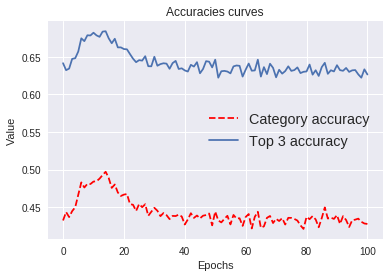

In [0]:
fig, ax = plt.subplots()
ax.plot(cat_acc, 'r--', label='Category accuracy')
ax.plot(top3_acc, label='Top 3 accuracy')
ax.legend(loc='center right', fontsize='x-large')
ax.set_title('Accuracies curves')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

Text(0,0.5,u'Value')

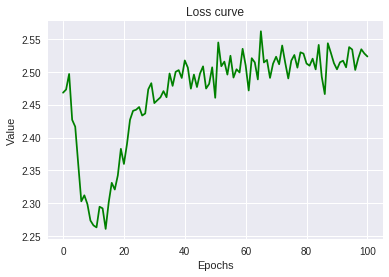

In [0]:
fig, ax = plt.subplots()
ax.plot(loss, 'g', label='loss')
ax.set_title('Loss curve')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

Text(0,0.5,u'Value')

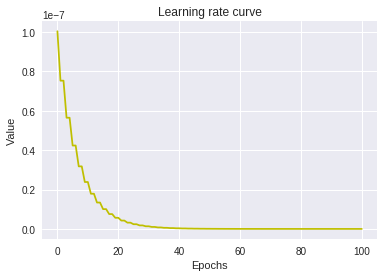

In [0]:
fig, ax = plt.subplots()
ax.plot(lr, 'y', label='loss')
ax.set_title('Learning rate curve')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

#### Массивы

In [0]:
cat_acc = [0.4322509765625,
  0.4434814453125,
  0.436767578125,
  0.4447021484375,
  0.4498291015625,
  0.4664306640625,
  0.48291015625,
  0.47607421875,
  0.48095703125,
  0.480712890625,
  0.4840087890625,
  0.484375,
  0.4879150390625,
  0.49267578125,
  0.4970703125,
  0.48876953125,
  0.4755859375,
  0.4801025390625,
  0.469482421875,
  0.46484375,
  0.4666748046875,
  0.4674072265625,
  0.4541015625,
  0.453125,
  0.4449462890625,
  0.4541015625,
  0.449951171875,
  0.453857421875,
  0.4384765625,
  0.44384765625,
  0.4490966796875,
  0.4451904296875,
  0.43798828125,
  0.442138671875,
  0.4393310546875,
  0.43408203125,
  0.4383544921875,
  0.4381103515625,
  0.4400634765625,
  0.4375,
  0.4268798828125,
  0.43359375,
  0.44189453125,
  0.4356689453125,
  0.4388427734375,
  0.43505859375,
  0.4385986328125,
  0.439453125,
  0.4415283203125,
  0.42578125,
  0.444091796875,
  0.4322509765625,
  0.4296875,
  0.434326171875,
  0.4384765625,
  0.427001953125,
  0.4395751953125,
  0.434814453125,
  0.4351806640625,
  0.425048828125,
  0.4368896484375,
  0.4407958984375,
  0.421630859375,
  0.4371337890625,
  0.44384765625,
  0.422607421875,
  0.4244384765625,
  0.435791015625,
  0.438232421875,
  0.4288330078125,
  0.4344482421875,
  0.4315185546875,
  0.435302734375,
  0.4268798828125,
  0.435791015625,
  0.4356689453125,
  0.434326171875,
  0.43212890625,
  0.42578125,
  0.4210205078125,
  0.43701171875,
  0.4339599609375,
  0.4381103515625,
  0.43359375,
  0.4232177734375,
  0.4354248046875,
  0.4495849609375,
  0.434814453125,
  0.43603515625,
  0.434326171875,
  0.4393310546875,
  0.427734375,
  0.43798828125,
  0.432861328125,
  0.423583984375,
  0.4324951171875,
  0.433349609375,
  0.4346923828125,
  0.4305419921875,
  0.42822265625,
  0.4276123046875]
loss = [2.4680885784327984,
  2.472873527556658,
  2.4965452067553997,
  2.4268768951296806,
  2.4164752513170242,
  2.359053226187825,
  2.3030606023967266,
  2.3121595233678818,
  2.2988932579755783,
  2.273866046220064,
  2.2664893195033073,
  2.2634465489536524,
  2.29483843781054,
  2.292356889694929,
  2.261128695681691,
  2.3013865780085325,
  2.331161566078663,
  2.3209762051701546,
  2.3425158616155386,
  2.382807033136487,
  2.3598240986466408,
  2.3897702768445015,
  2.4268571883440018,
  2.4405363239347935,
  2.442212674766779,
  2.446333918720484,
  2.4333897791802883,
  2.436490997672081,
  2.473171040415764,
  2.4825322180986404,
  2.4522971492260695,
  2.456740587949753,
  2.461005538702011,
  2.4704791717231274,
  2.461165402084589,
  2.4972593560814857,
  2.478463299572468,
  2.499819088727236,
  2.5023694150149822,
  2.490478605031967,
  2.517062198370695,
  2.5062113143503666,
  2.4742205403745174,
  2.495595920830965,
  2.4766996167600155,
  2.497177306562662,
  2.5080887600779533,
  2.474413773044944,
  2.481488808989525,
  2.506655767560005,
  2.460327574983239,
  2.544426079839468,
  2.508283633738756,
  2.515280596911907,
  2.495601087808609,
  2.5242313779890537,
  2.491091188043356,
  2.503649730235338,
  2.498815592378378,
  2.5347756147384644,
  2.509564932435751,
  2.471431352198124,
  2.52050119638443,
  2.5140980444848537,
  2.4882354140281677,
  2.561452727764845,
  2.514063909649849,
  2.5178940519690514,
  2.490605767816305,
  2.5121261924505234,
  2.5227228552103043,
  2.5112877301871777,
  2.5397618897259235,
  2.5135655775666237,
  2.4897408299148083,
  2.5168511047959328,
  2.5253648720681667,
  2.5061205588281155,
  2.5294235106557608,
  2.5274696983397007,
  2.51240024715662,
  2.509125415235758,
  2.5197943933308125,
  2.503511391580105,
  2.540722291916609,
  2.492282163351774,
  2.4659560546278954,
  2.543206974864006,
  2.528570022433996,
  2.5130017958581448,
  2.5036022551357746,
  2.514274623245001,
  2.516697980463505,
  2.5066333562135696,
  2.537329461425543,
  2.5336676351726055,
  2.502676784992218,
  2.520548664033413,
  2.5340559370815754,
  2.5276586897671223,
  2.5231171511113644]

lr = [1.0033913e-07,
  7.525435e-08,
  7.525435e-08,
  5.6440758e-08,
  5.6440758e-08,
  4.233057e-08,
  4.233057e-08,
  3.1747927e-08,
  3.1747927e-08,
  2.3810946e-08,
  2.3810946e-08,
  1.785821e-08,
  1.785821e-08,
  1.3393657e-08,
  1.3393657e-08,
  1.0045243e-08,
  1.0045243e-08,
  7.533932e-09,
  7.533932e-09,
  5.650449e-09,
  5.650449e-09,
  4.2378367e-09,
  4.2378367e-09,
  3.1783776e-09,
  3.1783776e-09,
  2.3837832e-09,
  2.3837832e-09,
  1.7878373e-09,
  1.7878373e-09,
  1.3408781e-09,
  1.3408781e-09,
  1.0056586e-09,
  1.0056586e-09,
  7.542439e-10,
  7.542439e-10,
  5.656829e-10,
  5.656829e-10,
  4.2426218e-10,
  4.2426218e-10,
  3.1819664e-10,
  3.1819664e-10,
  2.386475e-10,
  2.386475e-10,
  1.789856e-10,
  1.789856e-10,
  1.342392e-10,
  1.342392e-10,
  1.006794e-10,
  1.006794e-10,
  7.550956e-11,
  7.550956e-11,
  5.6632164e-11,
  5.6632164e-11,
  4.2474125e-11,
  4.2474125e-11,
  3.1855595e-11,
  3.1855595e-11,
  2.3891694e-11,
  2.3891694e-11,
  1.791877e-11,
  1.791877e-11,
  1.3439078e-11,
  1.3439078e-11,
  1.0079309e-11,
  1.0079309e-11,
  7.559482e-12,
  7.559482e-12,
  5.669611e-12,
  5.669611e-12,
  4.2522084e-12,
  4.2522084e-12,
  3.1891562e-12,
  3.1891562e-12,
  2.3918673e-12,
  2.3918673e-12,
  1.7939004e-12,
  1.7939004e-12,
  1.3454253e-12,
  1.3454253e-12,
  1.009069e-12,
  1.009069e-12,
  7.5680174e-13,
  7.5680174e-13,
  5.676013e-13,
  5.676013e-13,
  4.2570098e-13,
  4.2570098e-13,
  3.1927572e-13,
  3.1927572e-13,
  2.394568e-13,
  2.394568e-13,
  1.795926e-13,
  1.795926e-13,
  1.3469445e-13,
  1.3469445e-13,
  1.01020836e-13,
  1.01020836e-13,
  7.576563e-14,
  7.576563e-14,
  5.6824222e-14,
  5.6824222e-14]

top3_acc = [0.6414794921875,
  0.6322021484375,
  0.63427734375,
  0.647216796875,
  0.6480712890625,
  0.656982421875,
  0.674560546875,
  0.6707763671875,
  0.6785888671875,
  0.6783447265625,
  0.6820068359375,
  0.678466796875,
  0.676513671875,
  0.6834716796875,
  0.6839599609375,
  0.674560546875,
  0.66796875,
  0.6739501953125,
  0.6624755859375,
  0.6624755859375,
  0.6602783203125,
  0.659912109375,
  0.653564453125,
  0.6474609375,
  0.642822265625,
  0.6455078125,
  0.6448974609375,
  0.6507568359375,
  0.637451171875,
  0.6373291015625,
  0.6500244140625,
  0.6380615234375,
  0.6402587890625,
  0.641357421875,
  0.640869140625,
  0.634033203125,
  0.6416015625,
  0.64453125,
  0.6337890625,
  0.6346435546875,
  0.6318359375,
  0.63037109375,
  0.6392822265625,
  0.636962890625,
  0.642822265625,
  0.6280517578125,
  0.6337890625,
  0.6441650390625,
  0.6434326171875,
  0.6358642578125,
  0.6461181640625,
  0.6221923828125,
  0.6307373046875,
  0.6312255859375,
  0.63037109375,
  0.6279296875,
  0.63720703125,
  0.638427734375,
  0.637939453125,
  0.6236572265625,
  0.6328125,
  0.6409912109375,
  0.6314697265625,
  0.6318359375,
  0.6461181640625,
  0.6236572265625,
  0.63623046875,
  0.626953125,
  0.6407470703125,
  0.63525390625,
  0.6226806640625,
  0.6326904296875,
  0.6275634765625,
  0.6309814453125,
  0.6373291015625,
  0.6312255859375,
  0.63232421875,
  0.6358642578125,
  0.6282958984375,
  0.6300048828125,
  0.6304931640625,
  0.6396484375,
  0.626220703125,
  0.632080078125,
  0.62451171875,
  0.63623046875,
  0.6419677734375,
  0.6273193359375,
  0.632080078125,
  0.6304931640625,
  0.6387939453125,
  0.6322021484375,
  0.63134765625,
  0.6351318359375,
  0.6298828125,
  0.6319580078125,
  0.63232421875,
  0.6265869140625,
  0.6221923828125,
  0.63330078125,
  0.62646484375]



#### Графики

Text(0,0.5,u'Value')

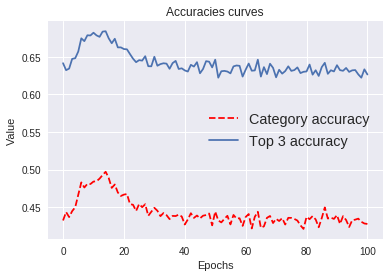

In [0]:
fig, ax = plt.subplots()
ax.plot(cat_acc, 'r--', label='Category accuracy')
ax.plot(top3_acc, label='Top 3 accuracy')
ax.legend(loc='center right', fontsize='x-large')
ax.set_title('Accuracies curves')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

Text(0,0.5,u'Value')

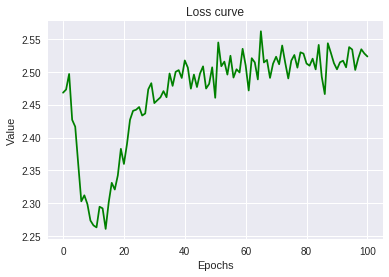

In [0]:
fig, ax = plt.subplots()
ax.plot(loss, 'g', label='loss')
ax.set_title('Loss curve')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

Text(0,0.5,u'Value')

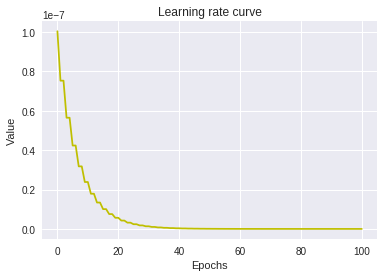

In [0]:
fig, ax = plt.subplots()
ax.plot(lr, 'y', label='loss')
ax.set_title('Learning rate curve')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

#### Массивы

In [0]:
cat_acc = [0.4322509765625,
  0.4434814453125,
  0.436767578125,
  0.4447021484375,
  0.4498291015625,
  0.4664306640625,
  0.48291015625,
  0.47607421875,
  0.48095703125,
  0.480712890625,
  0.4840087890625,
  0.484375,
  0.4879150390625,
  0.49267578125,
  0.4970703125,
  0.48876953125,
  0.4755859375,
  0.4801025390625,
  0.469482421875,
  0.46484375,
  0.4666748046875,
  0.4674072265625,
  0.4541015625,
  0.453125,
  0.4449462890625,
  0.4541015625,
  0.449951171875,
  0.453857421875,
  0.4384765625,
  0.44384765625,
  0.4490966796875,
  0.4451904296875,
  0.43798828125,
  0.442138671875,
  0.4393310546875,
  0.43408203125,
  0.4383544921875,
  0.4381103515625,
  0.4400634765625,
  0.4375,
  0.4268798828125,
  0.43359375,
  0.44189453125,
  0.4356689453125,
  0.4388427734375,
  0.43505859375,
  0.4385986328125,
  0.439453125,
  0.4415283203125,
  0.42578125,
  0.444091796875,
  0.4322509765625,
  0.4296875,
  0.434326171875,
  0.4384765625,
  0.427001953125,
  0.4395751953125,
  0.434814453125,
  0.4351806640625,
  0.425048828125,
  0.4368896484375,
  0.4407958984375,
  0.421630859375,
  0.4371337890625,
  0.44384765625,
  0.422607421875,
  0.4244384765625,
  0.435791015625,
  0.438232421875,
  0.4288330078125,
  0.4344482421875,
  0.4315185546875,
  0.435302734375,
  0.4268798828125,
  0.435791015625,
  0.4356689453125,
  0.434326171875,
  0.43212890625,
  0.42578125,
  0.4210205078125,
  0.43701171875,
  0.4339599609375,
  0.4381103515625,
  0.43359375,
  0.4232177734375,
  0.4354248046875,
  0.4495849609375,
  0.434814453125,
  0.43603515625,
  0.434326171875,
  0.4393310546875,
  0.427734375,
  0.43798828125,
  0.432861328125,
  0.423583984375,
  0.4324951171875,
  0.433349609375,
  0.4346923828125,
  0.4305419921875,
  0.42822265625,
  0.4276123046875]

loss = [2.4680885784327984,
  2.472873527556658,
  2.4965452067553997,
  2.4268768951296806,
  2.4164752513170242,
  2.359053226187825,
  2.3030606023967266,
  2.3121595233678818,
  2.2988932579755783,
  2.273866046220064,
  2.2664893195033073,
  2.2634465489536524,
  2.29483843781054,
  2.292356889694929,
  2.261128695681691,
  2.3013865780085325,
  2.331161566078663,
  2.3209762051701546,
  2.3425158616155386,
  2.382807033136487,
  2.3598240986466408,
  2.3897702768445015,
  2.4268571883440018,
  2.4405363239347935,
  2.442212674766779,
  2.446333918720484,
  2.4333897791802883,
  2.436490997672081,
  2.473171040415764,
  2.4825322180986404,
  2.4522971492260695,
  2.456740587949753,
  2.461005538702011,
  2.4704791717231274,
  2.461165402084589,
  2.4972593560814857,
  2.478463299572468,
  2.499819088727236,
  2.5023694150149822,
  2.490478605031967,
  2.517062198370695,
  2.5062113143503666,
  2.4742205403745174,
  2.495595920830965,
  2.4766996167600155,
  2.497177306562662,
  2.5080887600779533,
  2.474413773044944,
  2.481488808989525,
  2.506655767560005,
  2.460327574983239,
  2.544426079839468,
  2.508283633738756,
  2.515280596911907,
  2.495601087808609,
  2.5242313779890537,
  2.491091188043356,
  2.503649730235338,
  2.498815592378378,
  2.5347756147384644,
  2.509564932435751,
  2.471431352198124,
  2.52050119638443,
  2.5140980444848537,
  2.4882354140281677,
  2.561452727764845,
  2.514063909649849,
  2.5178940519690514,
  2.490605767816305,
  2.5121261924505234,
  2.5227228552103043,
  2.5112877301871777,
  2.5397618897259235,
  2.5135655775666237,
  2.4897408299148083,
  2.5168511047959328,
  2.5253648720681667,
  2.5061205588281155,
  2.5294235106557608,
  2.5274696983397007,
  2.51240024715662,
  2.509125415235758,
  2.5197943933308125,
  2.503511391580105,
  2.540722291916609,
  2.492282163351774,
  2.4659560546278954,
  2.543206974864006,
  2.528570022433996,
  2.5130017958581448,
  2.5036022551357746,
  2.514274623245001,
  2.516697980463505,
  2.5066333562135696,
  2.537329461425543,
  2.5336676351726055,
  2.502676784992218,
  2.520548664033413,
  2.5340559370815754,
  2.5276586897671223,
  2.5231171511113644]


[1.0033913e-07,
  7.525435e-08,
  7.525435e-08,
  5.6440758e-08,
  5.6440758e-08,
  4.233057e-08,
  4.233057e-08,
  3.1747927e-08,
  3.1747927e-08,
  2.3810946e-08,
  2.3810946e-08,
  1.785821e-08,
  1.785821e-08,
  1.3393657e-08,
  1.3393657e-08,
  1.0045243e-08,
  1.0045243e-08,
  7.533932e-09,
  7.533932e-09,
  5.650449e-09,
  5.650449e-09,
  4.2378367e-09,
  4.2378367e-09,
  3.1783776e-09,
  3.1783776e-09,
  2.3837832e-09,
  2.3837832e-09,
  1.7878373e-09,
  1.7878373e-09,
  1.3408781e-09,
  1.3408781e-09,
  1.0056586e-09,
  1.0056586e-09,
  7.542439e-10,
  7.542439e-10,
  5.656829e-10,
  5.656829e-10,
  4.2426218e-10,
  4.2426218e-10,
  3.1819664e-10,
  3.1819664e-10,
  2.386475e-10,
  2.386475e-10,
  1.789856e-10,
  1.789856e-10,
  1.342392e-10,
  1.342392e-10,
  1.006794e-10,
  1.006794e-10,
  7.550956e-11,
  7.550956e-11,
  5.6632164e-11,
  5.6632164e-11,
  4.2474125e-11,
  4.2474125e-11,
  3.1855595e-11,
  3.1855595e-11,
  2.3891694e-11,
  2.3891694e-11,
  1.791877e-11,
  1.791877e-11,
  1.3439078e-11,
  1.3439078e-11,
  1.0079309e-11,
  1.0079309e-11,
  7.559482e-12,
  7.559482e-12,
  5.669611e-12,
  5.669611e-12,
  4.2522084e-12,
  4.2522084e-12,
  3.1891562e-12,
  3.1891562e-12,
  2.3918673e-12,
  2.3918673e-12,
  1.7939004e-12,
  1.7939004e-12,
  1.3454253e-12,
  1.3454253e-12,
  1.009069e-12,
  1.009069e-12,
  7.5680174e-13,
  7.5680174e-13,
  5.676013e-13,
  5.676013e-13,
  4.2570098e-13,
  4.2570098e-13,
  3.1927572e-13,
  3.1927572e-13,
  2.394568e-13,
  2.394568e-13,
  1.795926e-13,
  1.795926e-13,
  1.3469445e-13,
  1.3469445e-13,
  1.01020836e-13,
  1.01020836e-13,
  7.576563e-14,
  7.576563e-14,
  5.6824222e-14,
  5.6824222e-14]

top3_acc = [0.6414794921875,
  0.6322021484375,
  0.63427734375,
  0.647216796875,
  0.6480712890625,
  0.656982421875,
  0.674560546875,
  0.6707763671875,
  0.6785888671875,
  0.6783447265625,
  0.6820068359375,
  0.678466796875,
  0.676513671875,
  0.6834716796875,
  0.6839599609375,
  0.674560546875,
  0.66796875,
  0.6739501953125,
  0.6624755859375,
  0.6624755859375,
  0.6602783203125,
  0.659912109375,
  0.653564453125,
  0.6474609375,
  0.642822265625,
  0.6455078125,
  0.6448974609375,
  0.6507568359375,
  0.637451171875,
  0.6373291015625,
  0.6500244140625,
  0.6380615234375,
  0.6402587890625,
  0.641357421875,
  0.640869140625,
  0.634033203125,
  0.6416015625,
  0.64453125,
  0.6337890625,
  0.6346435546875,
  0.6318359375,
  0.63037109375,
  0.6392822265625,
  0.636962890625,
  0.642822265625,
  0.6280517578125,
  0.6337890625,
  0.6441650390625,
  0.6434326171875,
  0.6358642578125,
  0.6461181640625,
  0.6221923828125,
  0.6307373046875,
  0.6312255859375,
  0.63037109375,
  0.6279296875,
  0.63720703125,
  0.638427734375,
  0.637939453125,
  0.6236572265625,
  0.6328125,
  0.6409912109375,
  0.6314697265625,
  0.6318359375,
  0.6461181640625,
  0.6236572265625,
  0.63623046875,
  0.626953125,
  0.6407470703125,
  0.63525390625,
  0.6226806640625,
  0.6326904296875,
  0.6275634765625,
  0.6309814453125,
  0.6373291015625,
  0.6312255859375,
  0.63232421875,
  0.6358642578125,
  0.6282958984375,
  0.6300048828125,
  0.6304931640625,
  0.6396484375,
  0.626220703125,
  0.632080078125,
  0.62451171875,
  0.63623046875,
  0.6419677734375,
  0.6273193359375,
  0.632080078125,
  0.6304931640625,
  0.6387939453125,
  0.6322021484375,
  0.63134765625,
  0.6351318359375,
  0.6298828125,
  0.6319580078125,
  0.63232421875,
  0.6265869140625,
  0.6221923828125,
  0.63330078125,
  0.62646484375]


#### Графики

Text(0,0.5,u'Value')

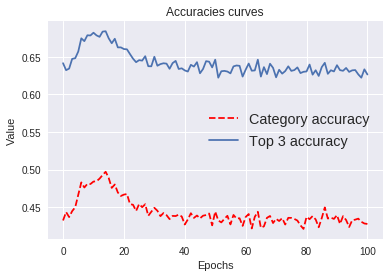

In [0]:
fig, ax = plt.subplots()
ax.plot(cat_acc, 'r--', label='Category accuracy')
ax.plot(top3_acc, label='Top 3 accuracy')
ax.legend(loc='center right', fontsize='x-large')
ax.set_title('Accuracies curves')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

Text(0,0.5,u'Value')

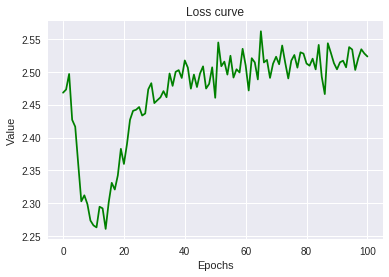

In [0]:
fig, ax = plt.subplots()
ax.plot(loss, 'g', label='loss')
ax.set_title('Loss curve')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

#### Вывод
При анализе изменямых параметров становится ясно, что проблема в том, что изначально выбран неправильный learning_rate (loss-графики)


## Эксперименты с агументацией данных:

### Резюме 

На лучшей модели проверяется гипотеза:

 - При увеличении картинки и поворотах можно будет выбрать некие фичи, что улучшить качество.
 Добавляем по одной картинке для каждого объекта => batch_size увеличивается в два раза. (Оставляем его таким, тк если мы уменьшим его в 2 раза, то потеряем в уникальных изображениях из исходных данных)

###  Модель без агументации данных.


In [0]:
BATCH_SIZE = 512
STEPS_PER_EPOCH = 128
EPOCHS = 50

def make_model():
  """
  Define your model architecture here.
  Returns `Sequential` model.
  """
  model = Sequential()

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
  model.add(BatchNormalization())
  
  model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
  model.add(BatchNormalization())
  
  model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D())

  
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D())

  
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D())

  
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D())

  
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D())

  
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(GlobalAveragePooling2D())

  model.add(Dense(64, activation='relu'))
  model.add(Dense(NUM_CLASSES, activation="softmax"))

  return model

### Массивы:

In [0]:
cat_acc =[0.110992431640625,
  0.18963623046875,
  0.263763427734375,
  0.3127899169921875,
  0.3480987548828125,
  0.3790130615234375,
  0.4034271240234375,
  0.4199981689453125,
  0.4349212646484375,
  0.4438629150390625,
  0.458953857421875,
  0.4643096923828125,
  0.4718780517578125,
  0.4775238037109375,
  0.4791717529296875,
  0.483062744140625,
  0.4871063232421875,
  0.491668701171875,
  0.4888153076171875,
  0.5007171630859375,
  0.49688720703125,
  0.499908447265625,
  0.498504638671875,
  0.502593994140625,
  0.5036468505859375,
  0.5051116943359375,
  0.50262451171875,
  0.5066375732421875,
  0.505859375,
  0.5013427734375,
  0.5063934326171875,
  0.50311279296875,
  0.5091552734375,
  0.5047607421875,
  0.5095672607421875,
  0.505645751953125,
  0.5090179443359375,
  0.506683349609375,
  0.5061798095703125,
  0.506500244140625,
  0.5070343017578125,
  0.511474609375,
  0.5070037841796875,
  0.507232666015625,
  0.510009765625,
  0.5093536376953125,
  0.5079498291015625,
  0.5080413818359375,
  0.50836181640625,
  0.506500244140625]

loss =  [4.759915500879288,
  4.119159534573555,
  3.668934267014265,
  3.344358215108514,
  3.122873591259122,
  2.949145160615444,
  2.809198673814535,
  2.72814286313951,
  2.650218477472663,
  2.593439484015107,
  2.5187066569924355,
  2.4914218112826347,
  2.449601475149393,
  2.41269388794899,
  2.4114991184324026,
  2.374601664021611,
  2.3659047223627567,
  2.3453390300273895,
  2.343330467119813,
  2.3026546854525805,
  2.3030626606196165,
  2.2994032129645348,
  2.297671416774392,
  2.282514115795493,
  2.278309663757682,
  2.2696991711854935,
  2.276376763358712,
  2.259805638343096,
  2.268813209608197,
  2.2780629005283117,
  2.264872604981065,
  2.2716403640806675,
  2.2652347832918167,
  2.262054679915309,
  2.26261237449944,
  2.271057326346636,
  2.2498729666695,
  2.2595823351293802,
  2.26347921974957,
  2.250196225941181,
  2.250006066635251,
  2.239623885601759,
  2.2500197663903236,
  2.2571550710126758,
  2.248923072591424,
  2.2539265109226108,
  2.2499399902299047,
  2.246763882227242,
  2.2393512036651373,
  2.2581502310931683]

lr = [1e-04,
  1e-04,
  7.5e-05,
  7.5e-05,
  5.625e-05,
  5.625e-05,
  4.21875e-05,
  4.21875e-05,
  3.1640626e-05,
  3.1640626e-05,
  2.3730468e-05,
  2.3730468e-05,
  1.779785e-05,
  1.779785e-05,
  1.3348389e-05,
  1.3348389e-05,
  1.0011291e-05,
  1.0011291e-05,
  7.5084686e-06,
  7.5084686e-06,
  5.6313515e-06,
  5.6313515e-06,
  4.2235138e-06,
  4.2235138e-06,
  3.1676352e-06,
  3.1676352e-06,
  2.3757264e-06,
  2.3757264e-06,
  1.7817948e-06,
  1.7817948e-06,
  1.3363461e-06,
  1.3363461e-06,
  1.0022595e-06,
  1.0022595e-06,
  7.516947e-07,
  7.516947e-07,
  5.6377104e-07,
  5.6377104e-07,
  4.2282826e-07,
  4.2282826e-07,
  3.171212e-07,
  3.171212e-07,
  2.378409e-07,
  2.378409e-07,
  1.7838067e-07,
  1.7838067e-07,
  1.337855e-07,
  1.337855e-07,
  1.0033913e-07,
  1.0033913e-07]

top3_acc = [0.2039642333984375,
  0.3274078369140625,
  0.419036865234375,
  0.4839324951171875,
  0.5266265869140625,
  0.5580596923828125,
  0.58770751953125,
  0.6025543212890625,
  0.615478515625,
  0.627197265625,
  0.6404266357421875,
  0.6468048095703125,
  0.654083251953125,
  0.659637451171875,
  0.660675048828125,
  0.667572021484375,
  0.66827392578125,
  0.6712188720703125,
  0.673370361328125,
  0.6812896728515625,
  0.6812744140625,
  0.6820526123046875,
  0.681671142578125,
  0.682464599609375,
  0.6859893798828125,
  0.686248779296875,
  0.6841583251953125,
  0.68798828125,
  0.68609619140625,
  0.6839599609375,
  0.688507080078125,
  0.683197021484375,
  0.68731689453125,
  0.6858367919921875,
  0.6888580322265625,
  0.6849517822265625,
  0.6927032470703125,
  0.6875762939453125,
  0.6843414306640625,
  0.6898040771484375,
  0.6904296875,
  0.6919097900390625,
  0.690185546875,
  0.687591552734375,
  0.69171142578125,
  0.6894683837890625,
  0.69219970703125,
  0.689666748046875,
  0.6897430419921875,
  0.68902587890625]

### Графики

Text(0,0.5,u'Value')

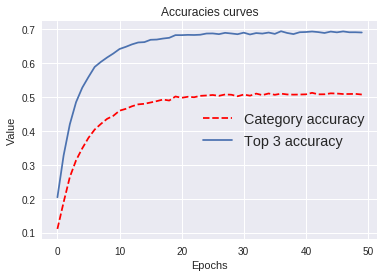

In [0]:
fig, ax = plt.subplots()
ax.plot(cat_acc, 'r--', label='Category accuracy')
ax.plot(top3_acc, label='Top 3 accuracy')
ax.legend(loc='center right', fontsize='x-large')
ax.set_title('Accuracies curves')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

Text(0,0.5,u'Value')

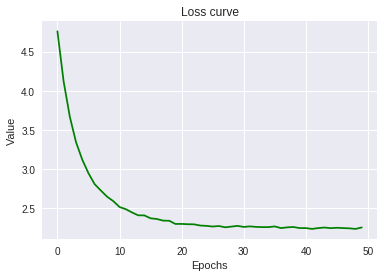

In [0]:
fig, ax = plt.subplots()
ax.plot(loss, 'g', label='loss')
ax.set_title('Loss curve')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

Text(0,0.5,u'Value')

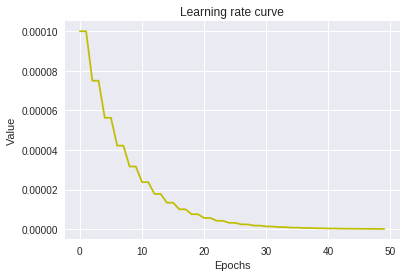

In [0]:
fig, ax = plt.subplots()
ax.plot(lr, 'y', label='loss')
ax.set_title('Learning rate curve')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

### Модель с агументацией данных

In [0]:
def images_and_labels_generator_with_aug(batch_size):
  image_gen = ImageDataGenerator(
    rotation_range=45,
    rescale=3.2,
    zoom_range=1.2
    
  )

  for batch in raw_batch_generator(batch_size):
    batch_images = []
    batch_labels = []
    for e in batch:
      image = draw_it(e[0])
      batch_images.append(image)
      image = np.tile(np.expand_dims(image, axis=2), (1, 1, 3))
      batch_labels.append(e[1])
      batch_images.append(image_gen.random_transform(image)[:,:,0])
      batch_labels.append(e[1])
        
      
    batch_images = np.stack(batch_images, axis=0)
    yield batch_images, batch_labels

### Массивы

In [0]:
cat_acc = [0.007415771484375,
  0.022796630859375,
  0.0433349609375,
  0.071258544921875,
  0.096160888671875,
  0.1148834228515625,
  0.1322021484375,
  0.14642333984375,
  0.1559906005859375,
  0.1679229736328125,
  0.1779937744140625,
  0.1855926513671875,
  0.191070556640625,
  0.197540283203125,
  0.201904296875,
  0.2020721435546875,
  0.2059326171875,
  0.209808349609375,
  0.2117462158203125,
  0.21240234375,
  0.216522216796875,
  0.216644287109375,
  0.218475341796875,
  0.2166595458984375,
  0.22039794921875,
  0.222259521484375,
  0.2225799560546875,
  0.2215118408203125,
  0.2217864990234375,
  0.225616455078125,
  0.2236328125,
  0.224639892578125,
  0.2237701416015625,
  0.226165771484375,
  0.22308349609375,
  0.22564697265625,
  0.2223663330078125,
  0.2261199951171875,
  0.2242279052734375,
  0.2274017333984375,
  0.224029541015625,
  0.226104736328125,
  0.225830078125,
  0.2285308837890625,
  0.225006103515625,
  0.2252655029296875,
  0.22607421875,
  0.22503662109375,
  0.2281494140625,
  0.2252655029296875]

loss = [5.7739698104560375,
  5.552871033549309,
  5.285460088402033,
  5.049863412976265,
  4.86707342043519,
  4.724752277135849,
  4.608510885387659,
  4.499989453703165,
  4.429089799523354,
  4.3647153079509735,
  4.294530261307955,
  4.239372041076422,
  4.203357718884945,
  4.171484369784594,
  4.149225004017353,
  4.129408471286297,
  4.111062694340944,
  4.074572619050741,
  4.071458769962192,
  4.067548392340541,
  4.043001951649785,
  4.033365316689014,
  4.026085656136274,
  4.0362971387803555,
  4.0240539107471704,
  4.009893884882331,
  4.005370466038585,
  4.013318680226803,
  4.006745036691427,
  3.9872453436255455,
  3.994716826826334,
  3.9803254026919603,
  4.002521056681871,
  3.982033709064126,
  4.000495778396726,
  3.9995923656970263,
  3.9951315131038427,
  3.9814962670207024,
  3.9901318419724703,
  3.9776270277798176,
  3.986276650801301,
  3.9780593495815992,
  3.981793038547039,
  3.9751983247697353,
  3.9906250424683094,
  3.9913211911916733,
  3.9747091848403215,
  3.9860664550215006,
  3.9766838401556015,
  3.9835875891149044]

lr = [1e-04,
  1e-04,
  7.5e-05,
  7.5e-05,
  5.625e-05,
  5.625e-05,
  4.21875e-05,
  4.21875e-05,
  3.1640626e-05,
  3.1640626e-05,
  2.3730468e-05,
  2.3730468e-05,
  1.779785e-05,
  1.779785e-05,
  1.3348389e-05,
  1.3348389e-05,
  1.0011291e-05,
  1.0011291e-05,
  7.5084686e-06,
  7.5084686e-06,
  5.6313515e-06,
  5.6313515e-06,
  4.2235138e-06,
  4.2235138e-06,
  3.1676352e-06,
  3.1676352e-06,
  2.3757264e-06,
  2.3757264e-06,
  1.7817948e-06,
  1.7817948e-06,
  1.3363461e-06,
  1.3363461e-06,
  1.0022595e-06,
  1.0022595e-06,
  7.516947e-07,
  7.516947e-07,
  5.6377104e-07,
  5.6377104e-07,
  4.2282826e-07,
  4.2282826e-07,
  3.171212e-07,
  3.171212e-07,
  2.378409e-07,
  2.378409e-07,
  1.7838067e-07,
  1.7838067e-07,
  1.337855e-07,
  1.337855e-07,
  1.0033913e-07,
  1.0033913e-07]

top3_acc = [0.02093505859375,
  0.0516204833984375,
  0.093505859375,
  0.140472412109375,
  0.1768646240234375,
  0.2042999267578125,
  0.227630615234375,
  0.25,
  0.2613372802734375,
  0.2771759033203125,
  0.2894744873046875,
  0.3008880615234375,
  0.306671142578125,
  0.3150177001953125,
  0.3198394775390625,
  0.322174072265625,
  0.328460693359375,
  0.3322906494140625,
  0.3319854736328125,
  0.3352203369140625,
  0.3384857177734375,
  0.33831787109375,
  0.3433685302734375,
  0.339630126953125,
  0.342987060546875,
  0.3454742431640625,
  0.3440399169921875,
  0.3446502685546875,
  0.3451080322265625,
  0.348846435546875,
  0.3479461669921875,
  0.347869873046875,
  0.3454132080078125,
  0.351226806640625,
  0.3463134765625,
  0.3502960205078125,
  0.3480377197265625,
  0.350341796875,
  0.348358154296875,
  0.35003662109375,
  0.3525238037109375,
  0.34930419921875,
  0.3510589599609375,
  0.3522796630859375,
  0.3479766845703125,
  0.3480072021484375,
  0.349853515625,
  0.3491668701171875,
  0.352203369140625,
  0.35040283203125]

### Графики

Text(0,0.5,u'Value')

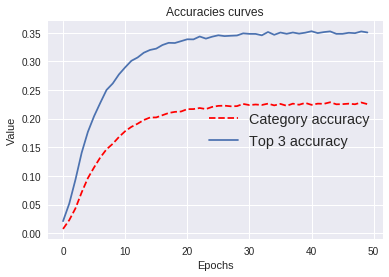

In [0]:
fig, ax = plt.subplots()
ax.plot(cat_acc, 'r--', label='Category accuracy')
ax.plot(top3_acc, label='Top 3 accuracy')
ax.legend(loc='center right', fontsize='x-large')
ax.set_title('Accuracies curves')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

Text(0,0.5,u'Value')

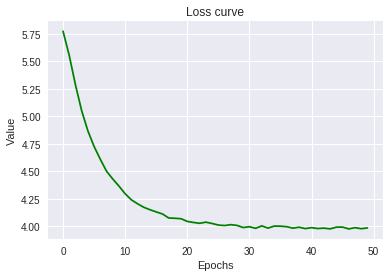

In [0]:
fig, ax = plt.subplots()
ax.plot(loss, 'g', label='loss')
ax.set_title('Loss curve')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

Text(0,0.5,u'Value')

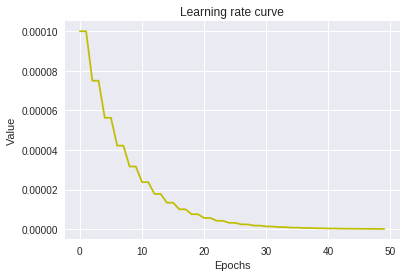

In [0]:
fig, ax = plt.subplots()
ax.plot(lr, 'y', label='loss')
ax.set_title('Learning rate curve')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

### Сравнение

### Массивы

In [0]:
cat_acc = [0.007415771484375,
  0.022796630859375,
  0.0433349609375,
  0.071258544921875,
  0.096160888671875,
  0.1148834228515625,
  0.1322021484375,
  0.14642333984375,
  0.1559906005859375,
  0.1679229736328125,
  0.1779937744140625,
  0.1855926513671875,
  0.191070556640625,
  0.197540283203125,
  0.201904296875,
  0.2020721435546875,
  0.2059326171875,
  0.209808349609375,
  0.2117462158203125,
  0.21240234375,
  0.216522216796875,
  0.216644287109375,
  0.218475341796875,
  0.2166595458984375,
  0.22039794921875,
  0.222259521484375,
  0.2225799560546875,
  0.2215118408203125,
  0.2217864990234375,
  0.225616455078125,
  0.2236328125,
  0.224639892578125,
  0.2237701416015625,
  0.226165771484375,
  0.22308349609375,
  0.22564697265625,
  0.2223663330078125,
  0.2261199951171875,
  0.2242279052734375,
  0.2274017333984375,
  0.224029541015625,
  0.226104736328125,
  0.225830078125,
  0.2285308837890625,
  0.225006103515625,
  0.2252655029296875,
  0.22607421875,
  0.22503662109375,
  0.2281494140625,
  0.2252655029296875]

loss = [5.7739698104560375,
  5.552871033549309,
  5.285460088402033,
  5.049863412976265,
  4.86707342043519,
  4.724752277135849,
  4.608510885387659,
  4.499989453703165,
  4.429089799523354,
  4.3647153079509735,
  4.294530261307955,
  4.239372041076422,
  4.203357718884945,
  4.171484369784594,
  4.149225004017353,
  4.129408471286297,
  4.111062694340944,
  4.074572619050741,
  4.071458769962192,
  4.067548392340541,
  4.043001951649785,
  4.033365316689014,
  4.026085656136274,
  4.0362971387803555,
  4.0240539107471704,
  4.009893884882331,
  4.005370466038585,
  4.013318680226803,
  4.006745036691427,
  3.9872453436255455,
  3.994716826826334,
  3.9803254026919603,
  4.002521056681871,
  3.982033709064126,
  4.000495778396726,
  3.9995923656970263,
  3.9951315131038427,
  3.9814962670207024,
  3.9901318419724703,
  3.9776270277798176,
  3.986276650801301,
  3.9780593495815992,
  3.981793038547039,
  3.9751983247697353,
  3.9906250424683094,
  3.9913211911916733,
  3.9747091848403215,
  3.9860664550215006,
  3.9766838401556015,
  3.9835875891149044]

lr = [1e-04,
  1e-04,
  7.5e-05,
  7.5e-05,
  5.625e-05,
  5.625e-05,
  4.21875e-05,
  4.21875e-05,
  3.1640626e-05,
  3.1640626e-05,
  2.3730468e-05,
  2.3730468e-05,
  1.779785e-05,
  1.779785e-05,
  1.3348389e-05,
  1.3348389e-05,
  1.0011291e-05,
  1.0011291e-05,
  7.5084686e-06,
  7.5084686e-06,
  5.6313515e-06,
  5.6313515e-06,
  4.2235138e-06,
  4.2235138e-06,
  3.1676352e-06,
  3.1676352e-06,
  2.3757264e-06,
  2.3757264e-06,
  1.7817948e-06,
  1.7817948e-06,
  1.3363461e-06,
  1.3363461e-06,
  1.0022595e-06,
  1.0022595e-06,
  7.516947e-07,
  7.516947e-07,
  5.6377104e-07,
  5.6377104e-07,
  4.2282826e-07,
  4.2282826e-07,
  3.171212e-07,
  3.171212e-07,
  2.378409e-07,
  2.378409e-07,
  1.7838067e-07,
  1.7838067e-07,
  1.337855e-07,
  1.337855e-07,
  1.0033913e-07,
  1.0033913e-07]

top3_acc = [0.02093505859375,
  0.0516204833984375,
  0.093505859375,
  0.140472412109375,
  0.1768646240234375,
  0.2042999267578125,
  0.227630615234375,
  0.25,
  0.2613372802734375,
  0.2771759033203125,
  0.2894744873046875,
  0.3008880615234375,
  0.306671142578125,
  0.3150177001953125,
  0.3198394775390625,
  0.322174072265625,
  0.328460693359375,
  0.3322906494140625,
  0.3319854736328125,
  0.3352203369140625,
  0.3384857177734375,
  0.33831787109375,
  0.3433685302734375,
  0.339630126953125,
  0.342987060546875,
  0.3454742431640625,
  0.3440399169921875,
  0.3446502685546875,
  0.3451080322265625,
  0.348846435546875,
  0.3479461669921875,
  0.347869873046875,
  0.3454132080078125,
  0.351226806640625,
  0.3463134765625,
  0.3502960205078125,
  0.3480377197265625,
  0.350341796875,
  0.348358154296875,
  0.35003662109375,
  0.3525238037109375,
  0.34930419921875,
  0.3510589599609375,
  0.3522796630859375,
  0.3479766845703125,
  0.3480072021484375,
  0.349853515625,
  0.3491668701171875,
  0.352203369140625,
  0.35040283203125]

#====================

cat_acc2 =[0.110992431640625,
  0.18963623046875,
  0.263763427734375,
  0.3127899169921875,
  0.3480987548828125,
  0.3790130615234375,
  0.4034271240234375,
  0.4199981689453125,
  0.4349212646484375,
  0.4438629150390625,
  0.458953857421875,
  0.4643096923828125,
  0.4718780517578125,
  0.4775238037109375,
  0.4791717529296875,
  0.483062744140625,
  0.4871063232421875,
  0.491668701171875,
  0.4888153076171875,
  0.5007171630859375,
  0.49688720703125,
  0.499908447265625,
  0.498504638671875,
  0.502593994140625,
  0.5036468505859375,
  0.5051116943359375,
  0.50262451171875,
  0.5066375732421875,
  0.505859375,
  0.5013427734375,
  0.5063934326171875,
  0.50311279296875,
  0.5091552734375,
  0.5047607421875,
  0.5095672607421875,
  0.505645751953125,
  0.5090179443359375,
  0.506683349609375,
  0.5061798095703125,
  0.506500244140625,
  0.5070343017578125,
  0.511474609375,
  0.5070037841796875,
  0.507232666015625,
  0.510009765625,
  0.5093536376953125,
  0.5079498291015625,
  0.5080413818359375,
  0.50836181640625,
  0.506500244140625]

loss2 =  [4.759915500879288,
  4.119159534573555,
  3.668934267014265,
  3.344358215108514,
  3.122873591259122,
  2.949145160615444,
  2.809198673814535,
  2.72814286313951,
  2.650218477472663,
  2.593439484015107,
  2.5187066569924355,
  2.4914218112826347,
  2.449601475149393,
  2.41269388794899,
  2.4114991184324026,
  2.374601664021611,
  2.3659047223627567,
  2.3453390300273895,
  2.343330467119813,
  2.3026546854525805,
  2.3030626606196165,
  2.2994032129645348,
  2.297671416774392,
  2.282514115795493,
  2.278309663757682,
  2.2696991711854935,
  2.276376763358712,
  2.259805638343096,
  2.268813209608197,
  2.2780629005283117,
  2.264872604981065,
  2.2716403640806675,
  2.2652347832918167,
  2.262054679915309,
  2.26261237449944,
  2.271057326346636,
  2.2498729666695,
  2.2595823351293802,
  2.26347921974957,
  2.250196225941181,
  2.250006066635251,
  2.239623885601759,
  2.2500197663903236,
  2.2571550710126758,
  2.248923072591424,
  2.2539265109226108,
  2.2499399902299047,
  2.246763882227242,
  2.2393512036651373,
  2.2581502310931683]

lr2 = [1e-04,
  1e-04,
  7.5e-05,
  7.5e-05,
  5.625e-05,
  5.625e-05,
  4.21875e-05,
  4.21875e-05,
  3.1640626e-05,
  3.1640626e-05,
  2.3730468e-05,
  2.3730468e-05,
  1.779785e-05,
  1.779785e-05,
  1.3348389e-05,
  1.3348389e-05,
  1.0011291e-05,
  1.0011291e-05,
  7.5084686e-06,
  7.5084686e-06,
  5.6313515e-06,
  5.6313515e-06,
  4.2235138e-06,
  4.2235138e-06,
  3.1676352e-06,
  3.1676352e-06,
  2.3757264e-06,
  2.3757264e-06,
  1.7817948e-06,
  1.7817948e-06,
  1.3363461e-06,
  1.3363461e-06,
  1.0022595e-06,
  1.0022595e-06,
  7.516947e-07,
  7.516947e-07,
  5.6377104e-07,
  5.6377104e-07,
  4.2282826e-07,
  4.2282826e-07,
  3.171212e-07,
  3.171212e-07,
  2.378409e-07,
  2.378409e-07,
  1.7838067e-07,
  1.7838067e-07,
  1.337855e-07,
  1.337855e-07,
  1.0033913e-07,
  1.0033913e-07]

top3_acc2 = [0.2039642333984375,
  0.3274078369140625,
  0.419036865234375,
  0.4839324951171875,
  0.5266265869140625,
  0.5580596923828125,
  0.58770751953125,
  0.6025543212890625,
  0.615478515625,
  0.627197265625,
  0.6404266357421875,
  0.6468048095703125,
  0.654083251953125,
  0.659637451171875,
  0.660675048828125,
  0.667572021484375,
  0.66827392578125,
  0.6712188720703125,
  0.673370361328125,
  0.6812896728515625,
  0.6812744140625,
  0.6820526123046875,
  0.681671142578125,
  0.682464599609375,
  0.6859893798828125,
  0.686248779296875,
  0.6841583251953125,
  0.68798828125,
  0.68609619140625,
  0.6839599609375,
  0.688507080078125,
  0.683197021484375,
  0.68731689453125,
  0.6858367919921875,
  0.6888580322265625,
  0.6849517822265625,
  0.6927032470703125,
  0.6875762939453125,
  0.6843414306640625,
  0.6898040771484375,
  0.6904296875,
  0.6919097900390625,
  0.690185546875,
  0.687591552734375,
  0.69171142578125,
  0.6894683837890625,
  0.69219970703125,
  0.689666748046875,
  0.6897430419921875,
  0.68902587890625]



### Графики

Text(0,0.5,u'Value')

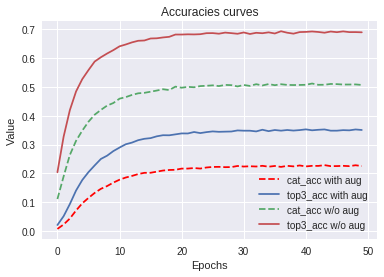

In [0]:
fig, ax = plt.subplots()
ax.plot(cat_acc, 'r--', label='cat_acc with aug')
ax.plot(top3_acc, label='top3_acc with aug')
ax.plot(cat_acc2, '--', label='cat_acc w/o aug')
ax.plot(top3_acc2, label='top3_acc w/o aug')
ax.legend()
ax.set_title('Accuracies curves')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

Text(0,0.5,u'Value')

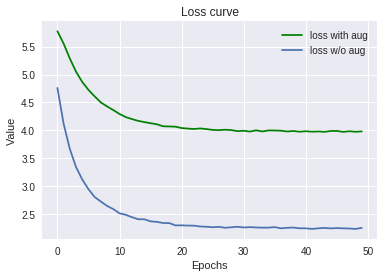

In [0]:
fig, ax = plt.subplots()
ax.plot(loss, 'g', label='loss with aug')
ax.plot(loss2, label='loss w/o aug')
ax.legend()
ax.set_title('Loss curve')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

### Вывод:
Качество при такой агументации ухудшилось, lr слишком маленький для выборки с аугументацией данных.

### Агументация с уменьшением размера и небольшими поворотами изображения

#### Агументация.

In [0]:
def images_and_labels_generator_with_aug(batch_size):
  image_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=3.2,
    zoom_range=-0.3,
    vertical_flip=True,
    horizontal_flip=True
  )

  for batch in raw_batch_generator(batch_size):
    batch_images = []
    batch_labels = []
    for e in batch:
      image = draw_it(e[0])
      batch_images.append(image)
      image = np.tile(np.expand_dims(image, axis=2), (1, 1, 3))
      batch_labels.append(e[1])
      batch_images.append(image_gen.random_transform(image)[:,:,0])
      batch_labels.append(e[1])
        
      
    batch_images = np.stack(batch_images, axis=0)
    yield batch_images, batch_labels


#### Массивы

In [0]:
cat_acc = [0.0087127685546875,
  0.0276947021484375,
  0.06304931640625,
  0.09869384765625,
  0.124664306640625,
  0.1497039794921875,
  0.177001953125,
  0.1910552978515625,
  0.2088623046875,
  0.2176971435546875,
  0.2317352294921875,
  0.24127197265625,
  0.24749755859375,
  0.2587738037109375,
  0.2598419189453125,
  0.26318359375,
  0.2672119140625,
  0.2713623046875,
  0.2757568359375,
  0.2765350341796875,
  0.2818145751953125,
  0.2821502685546875,
  0.280731201171875,
  0.2846221923828125,
  0.282562255859375,
  0.283599853515625,
  0.290496826171875,
  0.2921142578125,
  0.2920684814453125,
  0.2923431396484375,
  0.29144287109375,
  0.29083251953125,
  0.29058837890625,
  0.291778564453125,
  0.2912139892578125,
  0.2940673828125,
  0.288909912109375,
  0.29229736328125,
  0.29193115234375,
  0.2941741943359375,
  0.2956695556640625,
  0.2916107177734375,
  0.294952392578125,
  0.293853759765625,
  0.29119873046875,
  0.2921142578125,
  0.293975830078125,
  0.2911376953125,
  0.29229736328125,
  0.2939300537109375]

loss = [5.752310052514076,
  5.432461433112621,
  5.052845023572445,
  4.761567298322916,
  4.522728066891432,
  4.347186699509621,
  4.1746551394462585,
  4.056543312966824,
  3.9502307195216417,
  3.884231897071004,
  3.807611260563135,
  3.7380385622382164,
  3.702265363186598,
  3.6432966142892838,
  3.6268637981265783,
  3.6078698839992285,
  3.580007104203105,
  3.558967398479581,
  3.5352901369333267,
  3.5201967023313046,
  3.4939307868480682,
  3.500583516433835,
  3.502577595412731,
  3.4875891264528036,
  3.4821457285434008,
  3.478899395093322,
  3.4470438733696938,
  3.447694670408964,
  3.4554072562605143,
  3.4434306416660547,
  3.430903224274516,
  3.44375754147768,
  3.440896589308977,
  3.43197475746274,
  3.443271204829216,
  3.4251230377703905,
  3.4521923083812,
  3.4238597247749567,
  3.4304174333810806,
  3.4387022145092487,
  3.431653991341591,
  3.428588816896081,
  3.422405270859599,
  3.431295493617654,
  3.4358621444553137,
  3.430178115144372,
  3.4246390108019114,
  3.4308938942849636,
  3.4271194357424974,
  3.4163502026349306]

lr = [1e-04,
  1e-04,
  7.5e-05,
  7.5e-05,
  5.625e-05,
  5.625e-05,
  4.21875e-05,
  4.21875e-05,
  3.1640626e-05,
  3.1640626e-05,
  2.3730468e-05,
  2.3730468e-05,
  1.779785e-05,
  1.779785e-05,
  1.3348389e-05,
  1.3348389e-05,
  1.0011291e-05,
  1.0011291e-05,
  7.5084686e-06,
  7.5084686e-06,
  5.6313515e-06,
  5.6313515e-06,
  4.2235138e-06,
  4.2235138e-06,
  3.1676352e-06,
  3.1676352e-06,
  2.3757264e-06,
  2.3757264e-06,
  1.7817948e-06,
  1.7817948e-06,
  1.3363461e-06,
  1.3363461e-06,
  1.0022595e-06,
  1.0022595e-06,
  7.516947e-07,
  7.516947e-07,
  5.6377104e-07,
  5.6377104e-07,
  4.2282826e-07,
  4.2282826e-07,
  3.171212e-07,
  3.171212e-07,
  2.378409e-07,
  2.378409e-07,
  1.7838067e-07,
  1.7838067e-07,
  1.337855e-07,
  1.337855e-07,
  1.0033913e-07,
  1.0033913e-07]

top3_acc = [0.0234222412109375,
  0.0661163330078125,
  0.132171630859375,
  0.189178466796875,
  0.2332000732421875,
  0.2710113525390625,
  0.306976318359375,
  0.327606201171875,
  0.351043701171875,
  0.3638916015625,
  0.3812713623046875,
  0.3938751220703125,
  0.4019012451171875,
  0.4155120849609375,
  0.4175872802734375,
  0.421966552734375,
  0.4277496337890625,
  0.4312286376953125,
  0.44024658203125,
  0.4413604736328125,
  0.4432373046875,
  0.4459228515625,
  0.442474365234375,
  0.4476470947265625,
  0.4470977783203125,
  0.446441650390625,
  0.4565887451171875,
  0.4555511474609375,
  0.454071044921875,
  0.456451416015625,
  0.45697021484375,
  0.455047607421875,
  0.454010009765625,
  0.459625244140625,
  0.4550628662109375,
  0.4581756591796875,
  0.4505462646484375,
  0.457977294921875,
  0.4553070068359375,
  0.458099365234375,
  0.45916748046875,
  0.4562225341796875,
  0.4593353271484375,
  0.459564208984375,
  0.4541473388671875,
  0.457489013671875,
  0.4588623046875,
  0.45745849609375,
  0.4580078125,
  0.461517333984375]

#====================

cat_acc2 =[0.110992431640625,
  0.18963623046875,
  0.263763427734375,
  0.3127899169921875,
  0.3480987548828125,
  0.3790130615234375,
  0.4034271240234375,
  0.4199981689453125,
  0.4349212646484375,
  0.4438629150390625,
  0.458953857421875,
  0.4643096923828125,
  0.4718780517578125,
  0.4775238037109375,
  0.4791717529296875,
  0.483062744140625,
  0.4871063232421875,
  0.491668701171875,
  0.4888153076171875,
  0.5007171630859375,
  0.49688720703125,
  0.499908447265625,
  0.498504638671875,
  0.502593994140625,
  0.5036468505859375,
  0.5051116943359375,
  0.50262451171875,
  0.5066375732421875,
  0.505859375,
  0.5013427734375,
  0.5063934326171875,
  0.50311279296875,
  0.5091552734375,
  0.5047607421875,
  0.5095672607421875,
  0.505645751953125,
  0.5090179443359375,
  0.506683349609375,
  0.5061798095703125,
  0.506500244140625,
  0.5070343017578125,
  0.511474609375,
  0.5070037841796875,
  0.507232666015625,
  0.510009765625,
  0.5093536376953125,
  0.5079498291015625,
  0.5080413818359375,
  0.50836181640625,
  0.506500244140625]

loss2 =  [4.759915500879288,
  4.119159534573555,
  3.668934267014265,
  3.344358215108514,
  3.122873591259122,
  2.949145160615444,
  2.809198673814535,
  2.72814286313951,
  2.650218477472663,
  2.593439484015107,
  2.5187066569924355,
  2.4914218112826347,
  2.449601475149393,
  2.41269388794899,
  2.4114991184324026,
  2.374601664021611,
  2.3659047223627567,
  2.3453390300273895,
  2.343330467119813,
  2.3026546854525805,
  2.3030626606196165,
  2.2994032129645348,
  2.297671416774392,
  2.282514115795493,
  2.278309663757682,
  2.2696991711854935,
  2.276376763358712,
  2.259805638343096,
  2.268813209608197,
  2.2780629005283117,
  2.264872604981065,
  2.2716403640806675,
  2.2652347832918167,
  2.262054679915309,
  2.26261237449944,
  2.271057326346636,
  2.2498729666695,
  2.2595823351293802,
  2.26347921974957,
  2.250196225941181,
  2.250006066635251,
  2.239623885601759,
  2.2500197663903236,
  2.2571550710126758,
  2.248923072591424,
  2.2539265109226108,
  2.2499399902299047,
  2.246763882227242,
  2.2393512036651373,
  2.2581502310931683]

lr2 = [1e-04,
  1e-04,
  7.5e-05,
  7.5e-05,
  5.625e-05,
  5.625e-05,
  4.21875e-05,
  4.21875e-05,
  3.1640626e-05,
  3.1640626e-05,
  2.3730468e-05,
  2.3730468e-05,
  1.779785e-05,
  1.779785e-05,
  1.3348389e-05,
  1.3348389e-05,
  1.0011291e-05,
  1.0011291e-05,
  7.5084686e-06,
  7.5084686e-06,
  5.6313515e-06,
  5.6313515e-06,
  4.2235138e-06,
  4.2235138e-06,
  3.1676352e-06,
  3.1676352e-06,
  2.3757264e-06,
  2.3757264e-06,
  1.7817948e-06,
  1.7817948e-06,
  1.3363461e-06,
  1.3363461e-06,
  1.0022595e-06,
  1.0022595e-06,
  7.516947e-07,
  7.516947e-07,
  5.6377104e-07,
  5.6377104e-07,
  4.2282826e-07,
  4.2282826e-07,
  3.171212e-07,
  3.171212e-07,
  2.378409e-07,
  2.378409e-07,
  1.7838067e-07,
  1.7838067e-07,
  1.337855e-07,
  1.337855e-07,
  1.0033913e-07,
  1.0033913e-07]

top3_acc2 = [0.2039642333984375,
  0.3274078369140625,
  0.419036865234375,
  0.4839324951171875,
  0.5266265869140625,
  0.5580596923828125,
  0.58770751953125,
  0.6025543212890625,
  0.615478515625,
  0.627197265625,
  0.6404266357421875,
  0.6468048095703125,
  0.654083251953125,
  0.659637451171875,
  0.660675048828125,
  0.667572021484375,
  0.66827392578125,
  0.6712188720703125,
  0.673370361328125,
  0.6812896728515625,
  0.6812744140625,
  0.6820526123046875,
  0.681671142578125,
  0.682464599609375,
  0.6859893798828125,
  0.686248779296875,
  0.6841583251953125,
  0.68798828125,
  0.68609619140625,
  0.6839599609375,
  0.688507080078125,
  0.683197021484375,
  0.68731689453125,
  0.6858367919921875,
  0.6888580322265625,
  0.6849517822265625,
  0.6927032470703125,
  0.6875762939453125,
  0.6843414306640625,
  0.6898040771484375,
  0.6904296875,
  0.6919097900390625,
  0.690185546875,
  0.687591552734375,
  0.69171142578125,
  0.6894683837890625,
  0.69219970703125,
  0.689666748046875,
  0.6897430419921875,
  0.68902587890625]



#### Графики

Text(0,0.5,u'Value')

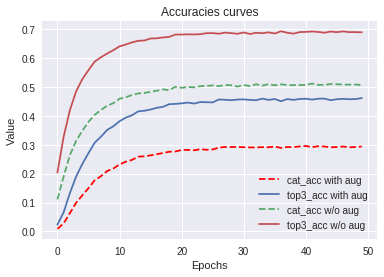

In [0]:
fig, ax = plt.subplots()
ax.plot(cat_acc, 'r--', label='cat_acc with aug')
ax.plot(top3_acc, label='top3_acc with aug')
ax.plot(cat_acc2, '--', label='cat_acc w/o aug')
ax.plot(top3_acc2, label='top3_acc w/o aug')
ax.legend()
ax.set_title('Accuracies curves')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

Text(0,0.5,u'Value')

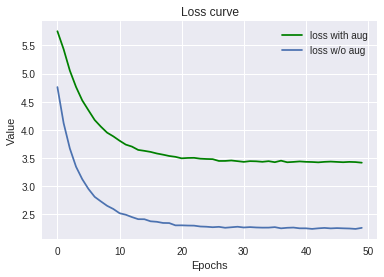

In [0]:
fig, ax = plt.subplots()
ax.plot(loss, 'g', label='loss with aug')
ax.plot(loss2, label='loss w/o aug')
ax.legend()
ax.set_title('Loss curve')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')

#### Вывод:

Качество при такой агументации ухудшилось, lr слишком маленький для выборки с аугументацией данных.
Ни одна из агументаций не была полезной, но последняя агументация дала результат лучше, чем первая

# Download data from Kaggle

In [0]:
# we need to use python 3 version of Kaggle!
# remove python 2 version with `pip uninstall kaggle`
! pip3 install kaggle --upgrade

    100% |████████████████████████████████| 61kB 2.8MB/s 
    100% |████████████████████████████████| 235kB 5.2MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/8b/21/3b/a0076243c6ae12a6215b2da515fe06b539aee7217b406e510e
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [0]:
# get <token> from https://www.kaggle.com/<user>/account, click "Create New API Token", open json file
! KAGGLE_USERNAME=pabramov KAGGLE_KEY=_ kaggle competitions download -c quickdraw-doodle-recognition -f train_simplified.zip

100% 7.37G/7.37G [00:53<00:00, 144MB/s]



In [0]:
# open zip file, will read everything from it
zf = zipfile.ZipFile("train_simplified.zip")

# Data generators from disk (no need to store in RAM)

In [0]:
class_labels = map(lambda x: x.replace(".csv", ""), zf.namelist())
class_labels[:5]

['fence', 'yoga', 'horse', 'sandwich', 'cat']

In [0]:
# loop through file eternally
def get_eternal_csv_generator(fn, debug=False):
    while True:
        with zf.open(fn) as f:
            f.readline()  # skip header
            for line in csv.reader(f, delimiter=',', quotechar='"'):
                yield line[1], line[5]
            if debug:
                print fn, "is done, starting from the beginning..."

In [0]:
def raw_batch_generator(batch_size, debug=False):
    generators = np.array([get_eternal_csv_generator(fn, debug) for fn in zf.namelist()])
    while True:
        random_indices = np.random.randint(0, len(generators), size=batch_size)
        yield [gen.next() for gen in generators[random_indices]]

# Images generator

In [0]:
# copy-paste from https://www.kaggle.com/jpmiller/image-based-cnn

import ast
from PIL import Image, ImageDraw

IMG_SIZE = 64

# faster conversion function
def draw_it(strokes):
    image = Image.new("P", (256, 256), color=255)
    image_draw = ImageDraw.Draw(image)
    for stroke in ast.literal_eval(strokes):
        for i in range(len(stroke[0])-1):
            image_draw.line([stroke[0][i], 
                             stroke[1][i],
                             stroke[0][i+1], 
                             stroke[1][i+1]],
                            fill=0, width=5)
    image = image.resize((IMG_SIZE, IMG_SIZE))
    return np.array(image, dtype=np.uint8)

In [0]:

def images_and_labels_generator_with_aug(batch_size):
  image_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=3.2,
    zoom_range=-0.3,
    vertical_flip=True,
    horizontal_flip=True
  )

  for batch in raw_batch_generator(batch_size):
    batch_images = []
    batch_labels = []
    for e in batch:
      image = draw_it(e[0])
      batch_images.append(image)
      image = np.tile(np.expand_dims(image, axis=2), (1, 1, 3))
      batch_labels.append(e[1])
      batch_images.append(image_gen.random_transform(image)[:,:,0])
      batch_labels.append(e[1])
        
      
    batch_images = np.stack(batch_images, axis=0)
    yield batch_images, batch_labels
  


def images_and_labels_generator(batch_size):
  
  for batch in raw_batch_generator(batch_size):
    batch_images = []
    batch_labels = []
    for e in batch:
      batch_images.append(draw_it(e[0]))
      batch_labels.append(e[1])
    batch_images = np.stack(batch_images, axis=0)
    yield batch_images, batch_labels


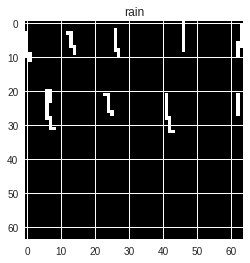

In [0]:
b = images_and_labels_generator(32).next()
plt.imshow(b[0][10, :, :])
plt.title(b[1][10])
plt.show()

# Train simple network

In [0]:
import tensorflow as tf
import keras
from keras import backend as K

In [0]:
# reset graph when you change architecture!
def reset_tf_session():
    curr_session = tf.get_default_session()
    # close current session
    if curr_session is not None:
        curr_session.close()
    # reset graph
    K.clear_session()
    # create new session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    s = tf.InteractiveSession(config=config)
    K.set_session(s)
    return s

In [0]:
NUM_CLASSES = len(class_labels)
class_to_idx = {c: idx for idx, c in enumerate(class_labels)}
class_to_idx.items()[:5]

[('snowman', 134),
 ('eyeglasses', 254),
 ('ceiling fan', 18),
 ('camel', 90),
 ('stove', 119)]

In [0]:
def train_iterator(batch_size):
    for batch in images_and_labels_generator_with_aug(batch_size):
        images = batch[0].astype('float32')
        images = images/255 - 0.5
        images = np.expand_dims(images, -1)
        labels = keras.utils.to_categorical(map(class_to_idx.get, batch[1]), NUM_CLASSES)
        yield images, labels

In [0]:
sample = train_iterator(32).next()
print sample[0].shape
print sample[1].shape

(64, 64, 64, 1)
(64, 340)


In [0]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, GlobalAveragePooling2D, \
    BatchNormalization

In [0]:
def make_model():
  """
  Define your model architecture here.
  Returns `Sequential` model.
  """
  model = Sequential()

  model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
  model.add(BatchNormalization())
  
  model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
  model.add(BatchNormalization())
  
  model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
  model.add(BatchNormalization())
  
  model.add(MaxPooling2D())

  
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D())

  
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D())

  
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D())

  
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D())

  
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  #model.add(MaxPooling2D())

  '''  
  model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())

  model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  '''
  model.add(GlobalAveragePooling2D())

  model.add(Dense(64, activation='relu'))
  model.add(Dense(NUM_CLASSES, activation="softmax"))

  return model

In [0]:
# describe model
s = reset_tf_session()  # clear default graph
model = make_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
__________

In [0]:
# custom metrics we need
from keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

In [0]:
BATCH_SIZE = 256
STEPS_PER_EPOCH = 128
EPOCHS = 50

s = reset_tf_session()  # clear default graph
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.adam(clipnorm=5.),  # gradient clipping just in case
    metrics=[categorical_accuracy, top_3_accuracy]  # report top 3 accuracy, correlates with MAP@3!
)

In [0]:
# for saving the model after every epoch
from keras.models import save_model

class ModelSaveCallback(keras.callbacks.Callback):
    def __init__(self, file_name):
        super(ModelSaveCallback, self).__init__()
        self.file_name = file_name

    def on_epoch_end(self, epoch, logs=None):
        model_filename = self.file_name.format(epoch)
        save_model(self.model, model_filename)
        print("Model saved in {}".format(model_filename))

In [0]:
import os
GOOGLE_DRIVE_ROOT = GOOGLE_DRIVE_MOUNT + "/" + filter(lambda x: x[0] != '.', os.listdir(GOOGLE_DRIVE_MOUNT))[0]
print GOOGLE_DRIVE_ROOT

# will save checkpoints to Google Drive
CHECKPOINT_TEMPLATE = GOOGLE_DRIVE_ROOT + "/model_{}"
print CHECKPOINT_TEMPLATE

/content/gdrive/My Drive
/content/gdrive/My Drive/model_{}


In [0]:
last_finished_epoch = 0

# you can continue from snapshot!!!
#from keras.models import load_model
#s = reset_tf_session()
#last_finished_epoch = 49
#model = load_model("model_{}".format(last_finished_epoch), 
#                   custom_objects={"top_3_accuracy": top_3_accuracy})

In [0]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler

def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=10):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''
    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch/step_size))
    
    return LearningRateScheduler(schedule)

lr_sched = step_decay_schedule(initial_lr=1e-4, decay_factor=0.75, step_size=2)


In [0]:
# fit the model with our eternal generator!
graph_result = model.fit_generator(
    train_iterator(BATCH_SIZE), 
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=EPOCHS,
    callbacks=[ModelSaveCallback("model_{}"),
              ReduceLROnPlateau(model='top3_accuracy', factor=0.2,verbose=1,
              patience=1, min_lr=0.0001),
              lr_sched],
    verbose=1,
    initial_epoch=last_finished_epoch
)



Exception tensorflow.python.framework.errors_impl.CancelledError: CancelledError() in <bound method _Callable.__del__ of <tensorflow.python.client.session._Callable object at 0x7f60906bd290>> ignored
Exception tensorflow.python.framework.errors_impl.CancelledError: CancelledError() in <bound method _Callable.__del__ of <tensorflow.python.client.session._Callable object at 0x7f607de35250>> ignored


Epoch 1/50
128/128 [==============================] - 86s 668ms/step - loss: 5.7523 - categorical_accuracy: 0.0087 - top_3_accuracy: 0.0234
Model saved in model_0
Epoch 2/50
128/128 [==============================] - 80s 621ms/step - loss: 5.4325 - categorical_accuracy: 0.0277 - top_3_accuracy: 0.0661
Model saved in model_1
Epoch 3/50
128/128 [==============================] - 80s 623ms/step - loss: 5.0528 - categorical_accuracy: 0.0630 - top_3_accuracy: 0.1322
Model saved in model_2
Epoch 4/50
128/128 [==============================] - 81s 633ms/step - loss: 4.7616 - categorical_accuracy: 0.0987 - top_3_accuracy: 0.1892
Model saved in model_3
Epoch 5/50
128/128 [==============================] - 82s 639ms/step - loss: 4.5227 - categorical_accuracy: 0.1247 - top_3_accuracy: 0.2332
Model saved in model_4
Epoch 6/50
128/128 [==============================] - 83s 645ms/step - loss: 4.3472 - categorical_accuracy: 0.1497 - top_3_accuracy: 0.2710
Model saved in model_5
Epoch 7/50
128/128 [==

In [0]:
bimbo = graph_result.__dict__

# Score test set

In [0]:
# download test set
! KAGGLE_USERNAME=pabramov KAGGLE_KEY=_ kaggle competitions download -c quickdraw-doodle-recognition -f test_simplified.csv

test_simplified.csv: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
def test_csv_iterator(batch_size):
    with open("test_simplified.csv", "r") as f:
        batch_keys = []
        batch_images = []
        f.readline()  # skip header
        for line in csv.reader(f, delimiter=',', quotechar='"'):
            batch_keys.append(line[0])
            batch_images.append(draw_it(line[2]))
            if len(batch_images) == batch_size:
                batch_images = np.stack(batch_images, axis=0)
                batch_images = np.expand_dims(batch_images, -1)
                batch_images = batch_images.astype('float32')
                batch_images = batch_images/255 - 0.5
                ### YOUR CODE HERE: normalize batch_images the same way as during training!
                yield batch_keys, batch_images
                batch_keys = []
                batch_images = []
        if batch_images:  # last batch
            batch_images = np.stack(batch_images, axis=0)
            batch_images = np.expand_dims(batch_images, -1)
            batch_images = batch_images.astype('float32')
            batch_images = batch_images/255 - 0.5
            ### YOUR CODE HERE: normalize batch_images the same way as during training!
            yield batch_keys, batch_images

In [0]:
! wc -l test_simplified.csv

112200 test_simplified.csv


In [0]:
with open("submission.csv", "w", buffering=1*1024*1024) as f:
    f.write("key_id,word\n")
    for batch_keys, batch_images in tqdm.tqdm(test_csv_iterator(BATCH_SIZE), total=np.ceil(112200./BATCH_SIZE)):
        probas = model.predict_proba(batch_images, BATCH_SIZE)
        top_3_classes = np.argsort(probas, axis=1)[:, [-1, -2, -3]]
        labels = map(lambda x: " ".join("_".join(class_labels[idx].split()) for idx in x), top_3_classes)
        for key, labels in zip(batch_keys, labels):
            f.write(key + "," + labels + "\n")

100%|██████████| 220/220.0 [04:25<00:00,  1.07s/it]


In [0]:
! wc -l submission.csv

112200 submission.csv


In [0]:
# submit to kaggle
! KAGGLE_USERNAME=pabramov KAGGLE_KEY=_ kaggle competitions submit quickdraw-doodle-recognition -f submission.csv -m "Try Harder #1"

100% 4.41M/4.41M [00:00<00:00, 12.8MB/s]
Successfully submitted to Quick, Draw! Doodle Recognition Challenge